## Assessing the coverage of Agilent XTHS All In One panel when used with 3ng of very low quality DNA (DIN <3)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

In [19]:
sample_names_raw = {
"hybr4_S8":"3ng_M1_A",
"hybr1_S1":"3ng_M2_A",
"hybr1_S2":"3ng_M3_A",
"hybr4_S9":"3ng_M5_A",
"hybr1_S3":"100ng_M4_A",
"hybr5_S10":"FFPE_3ng_B_1",
"hybr1_S4":"FFPE_3ng_B_2",
"hybr1_S5":"FFPE_3ng_C_1",
"hybr5_S11":"FFPE_3ng_C_2",
"hybr2":"3ng_repS_B",
"hybr3":"100ng_repS_C"}

sample_names = {
"hybr4_S8":"FFPE_3ng_A_1",
"hybr1_S1":"FFPE_3ng_A_2",
"hybr1_S2":"FFPE_3ng_A_3",
"hybr4_S9":"FFPE_3ng_A_4",
"hybr5_S10":"FFPE_3ng_B_1",
"hybr1_S4":"FFPE_3ng_B_2",
"hybr1_S5":"FFPE_3ng_C_1",
"hybr5_S11":"FFPE_3ng_C_2",
"hybr2_S6":"FFPE_3ng_S",
"hybr3_S7":"FFPE_100ng_S"}

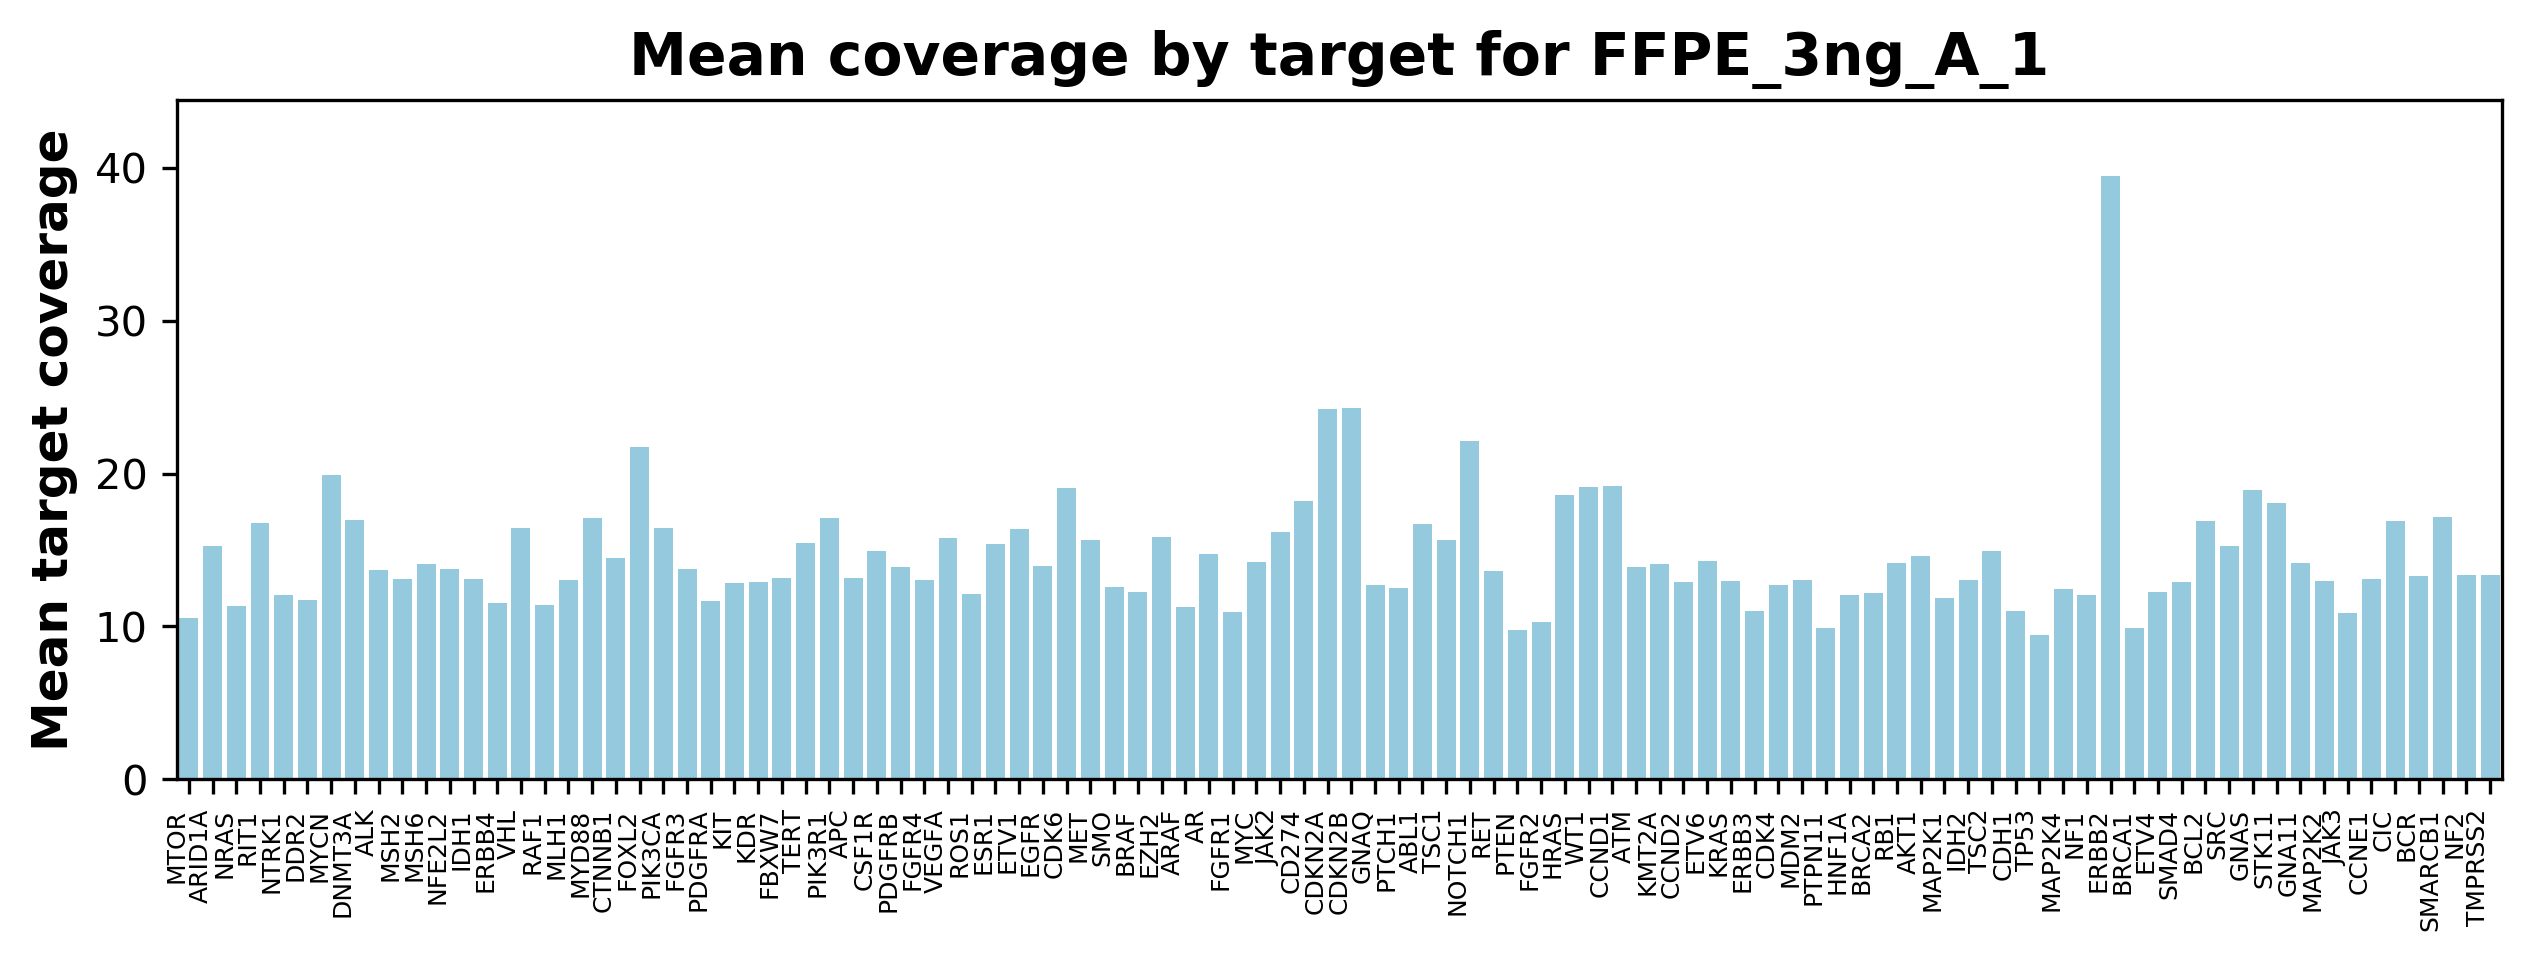

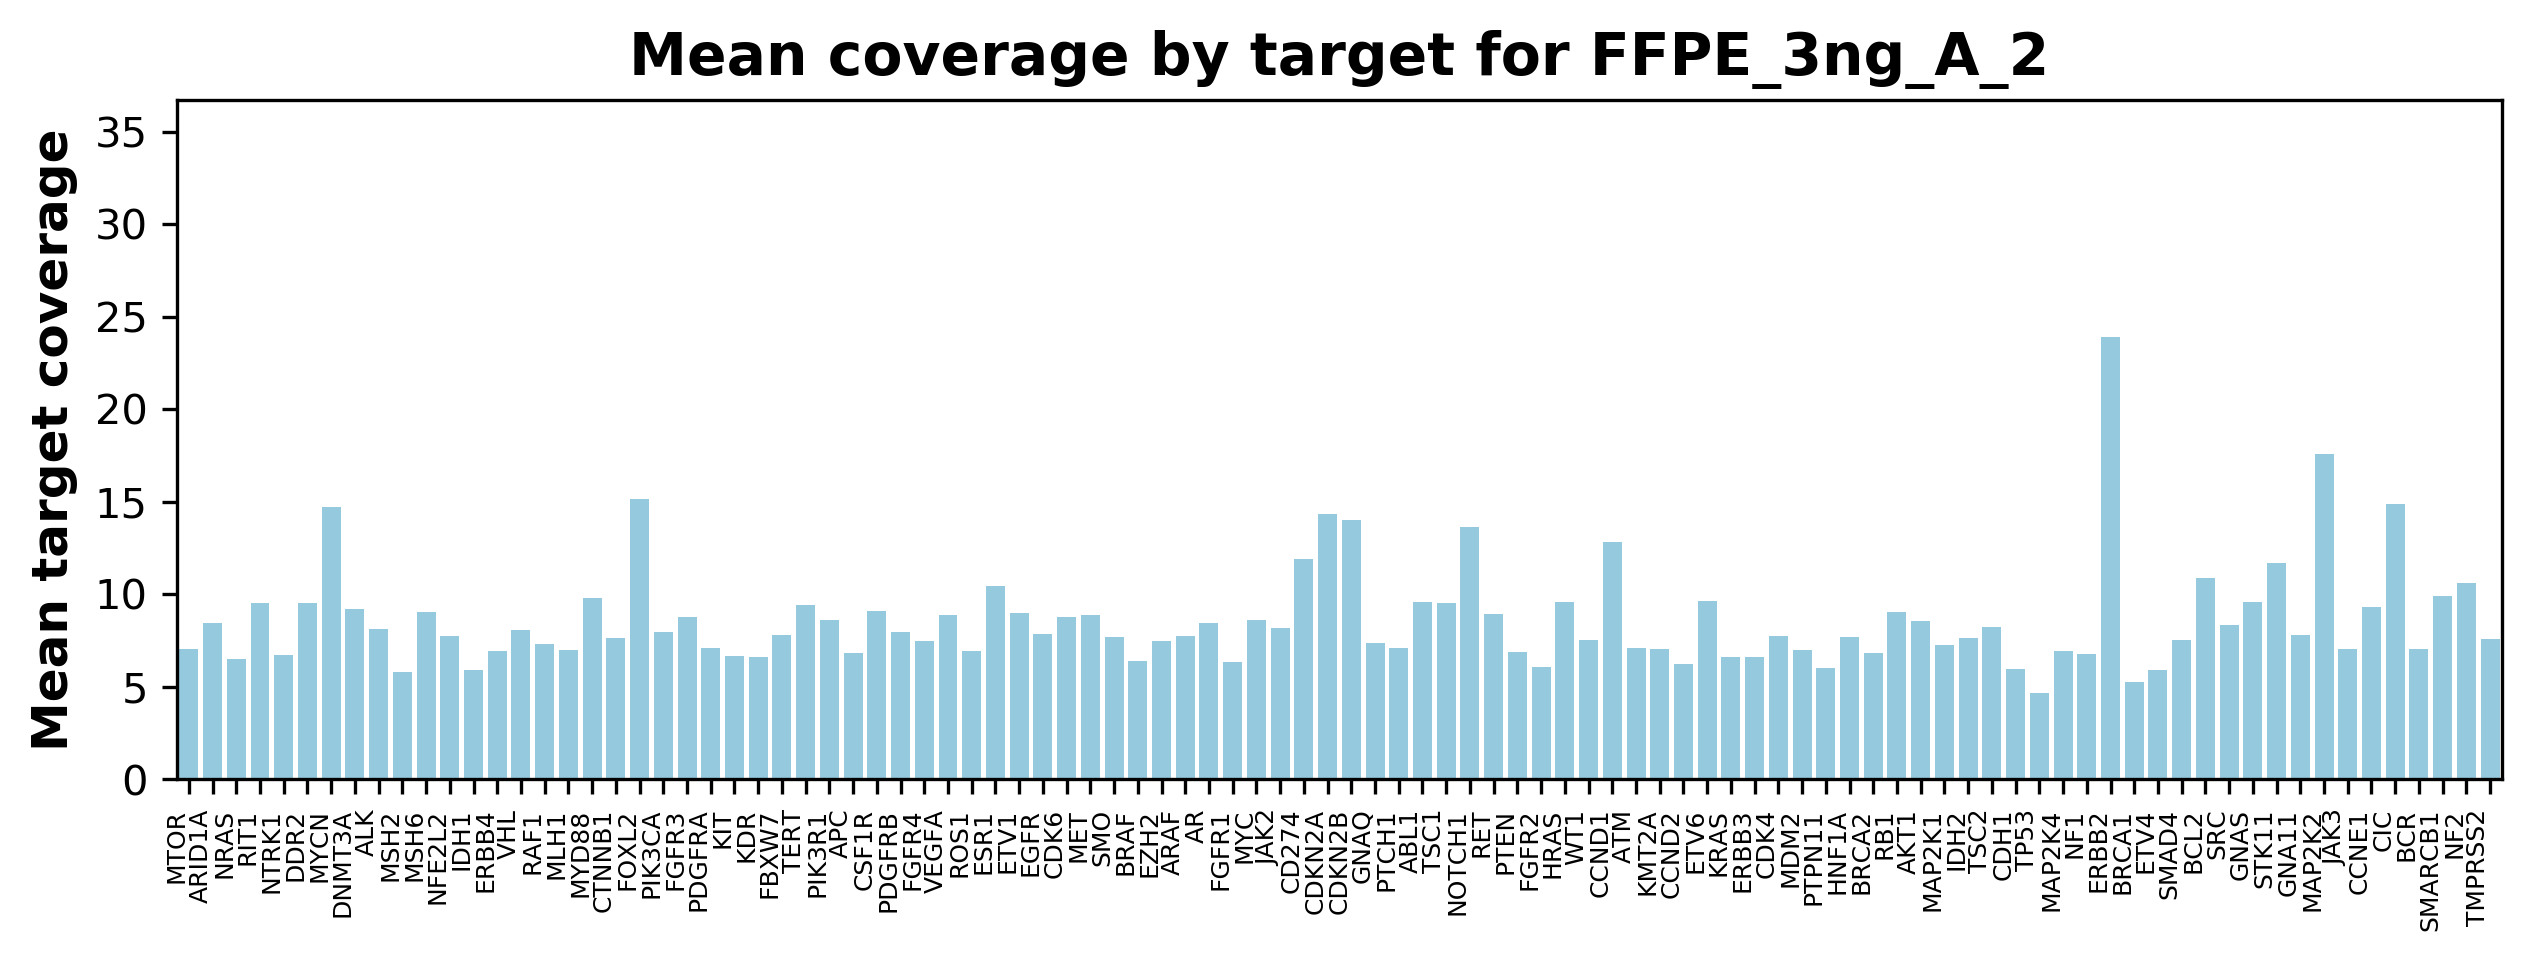

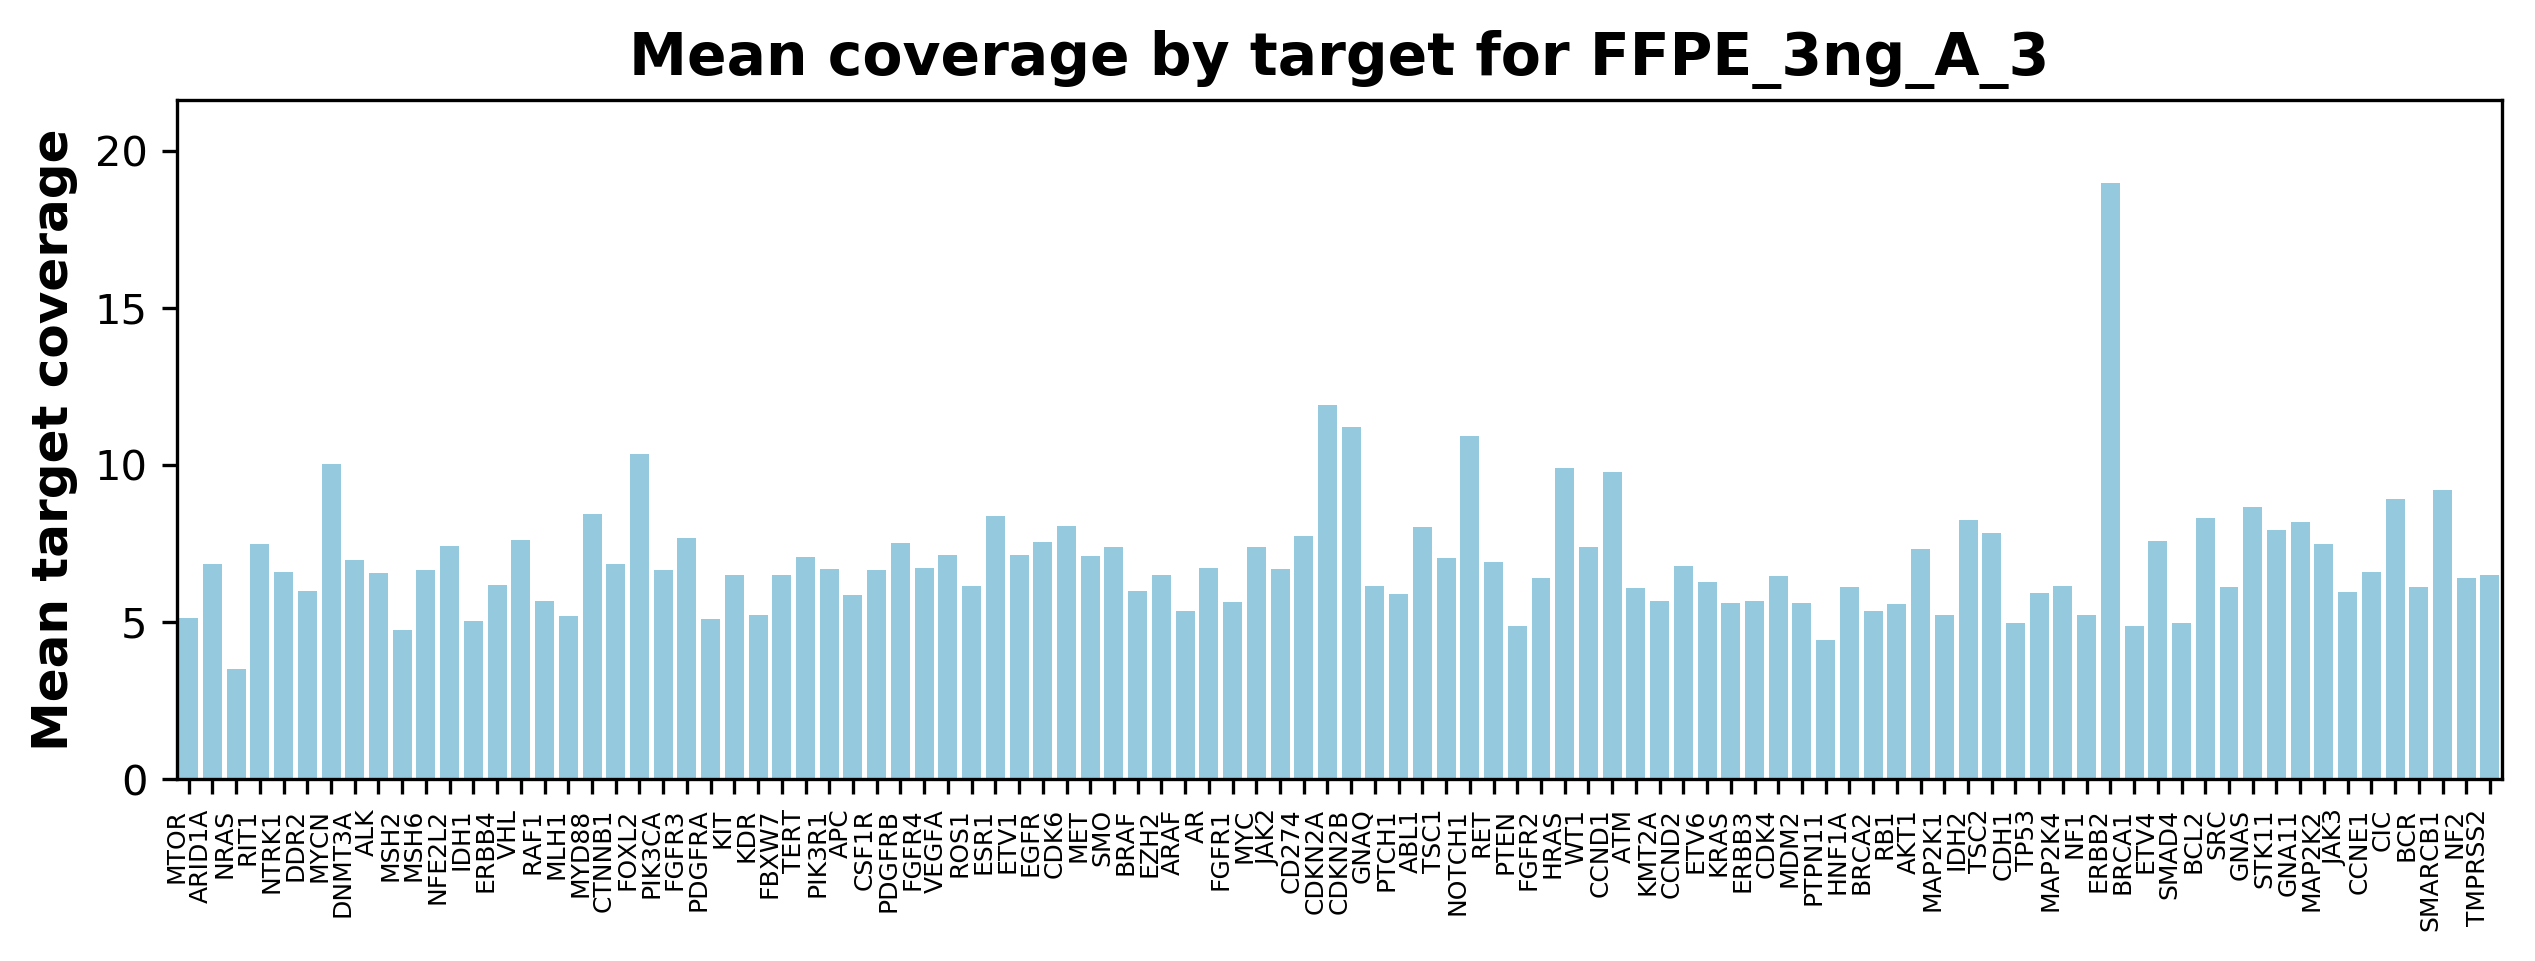

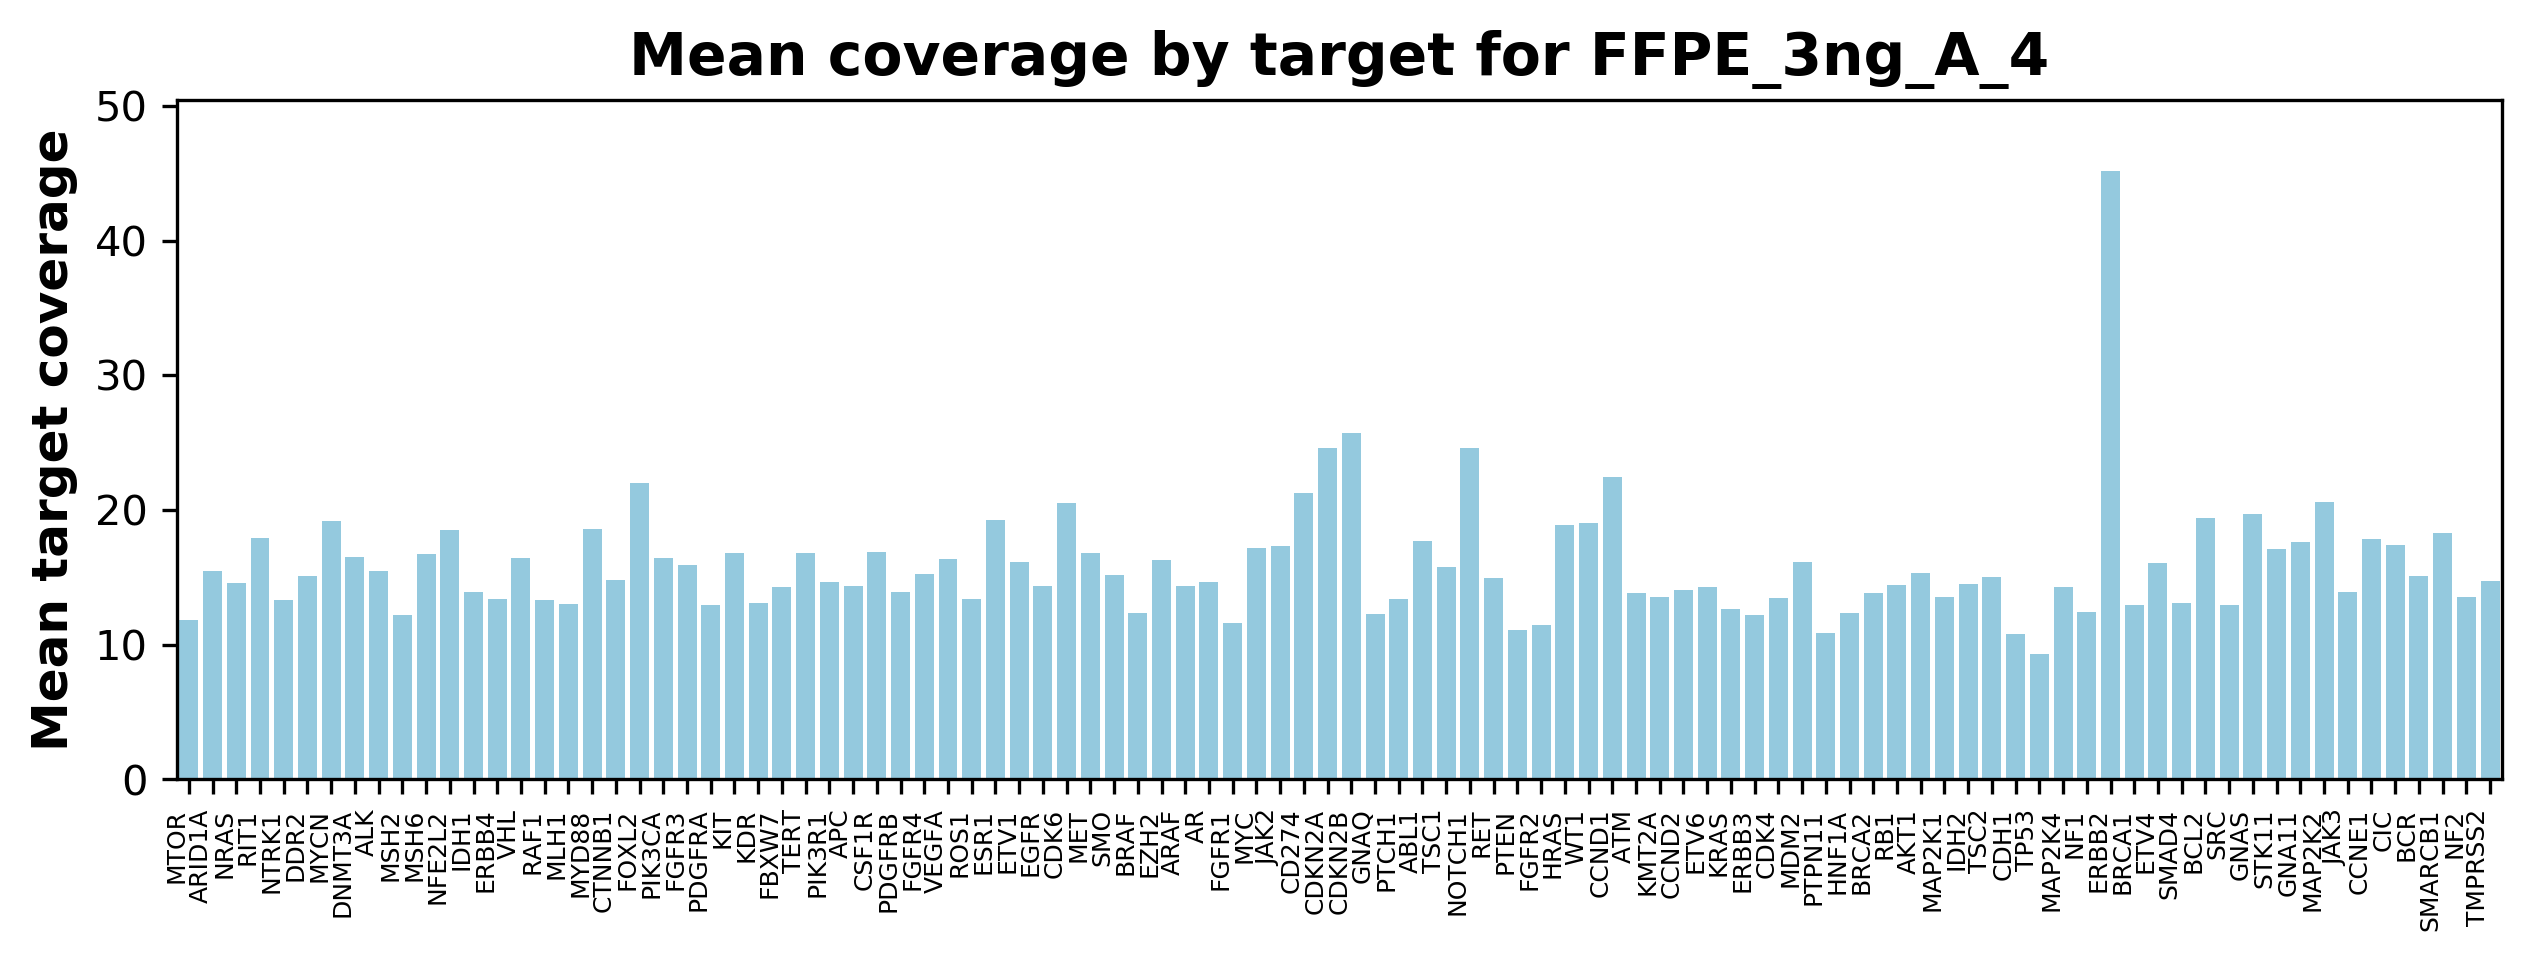

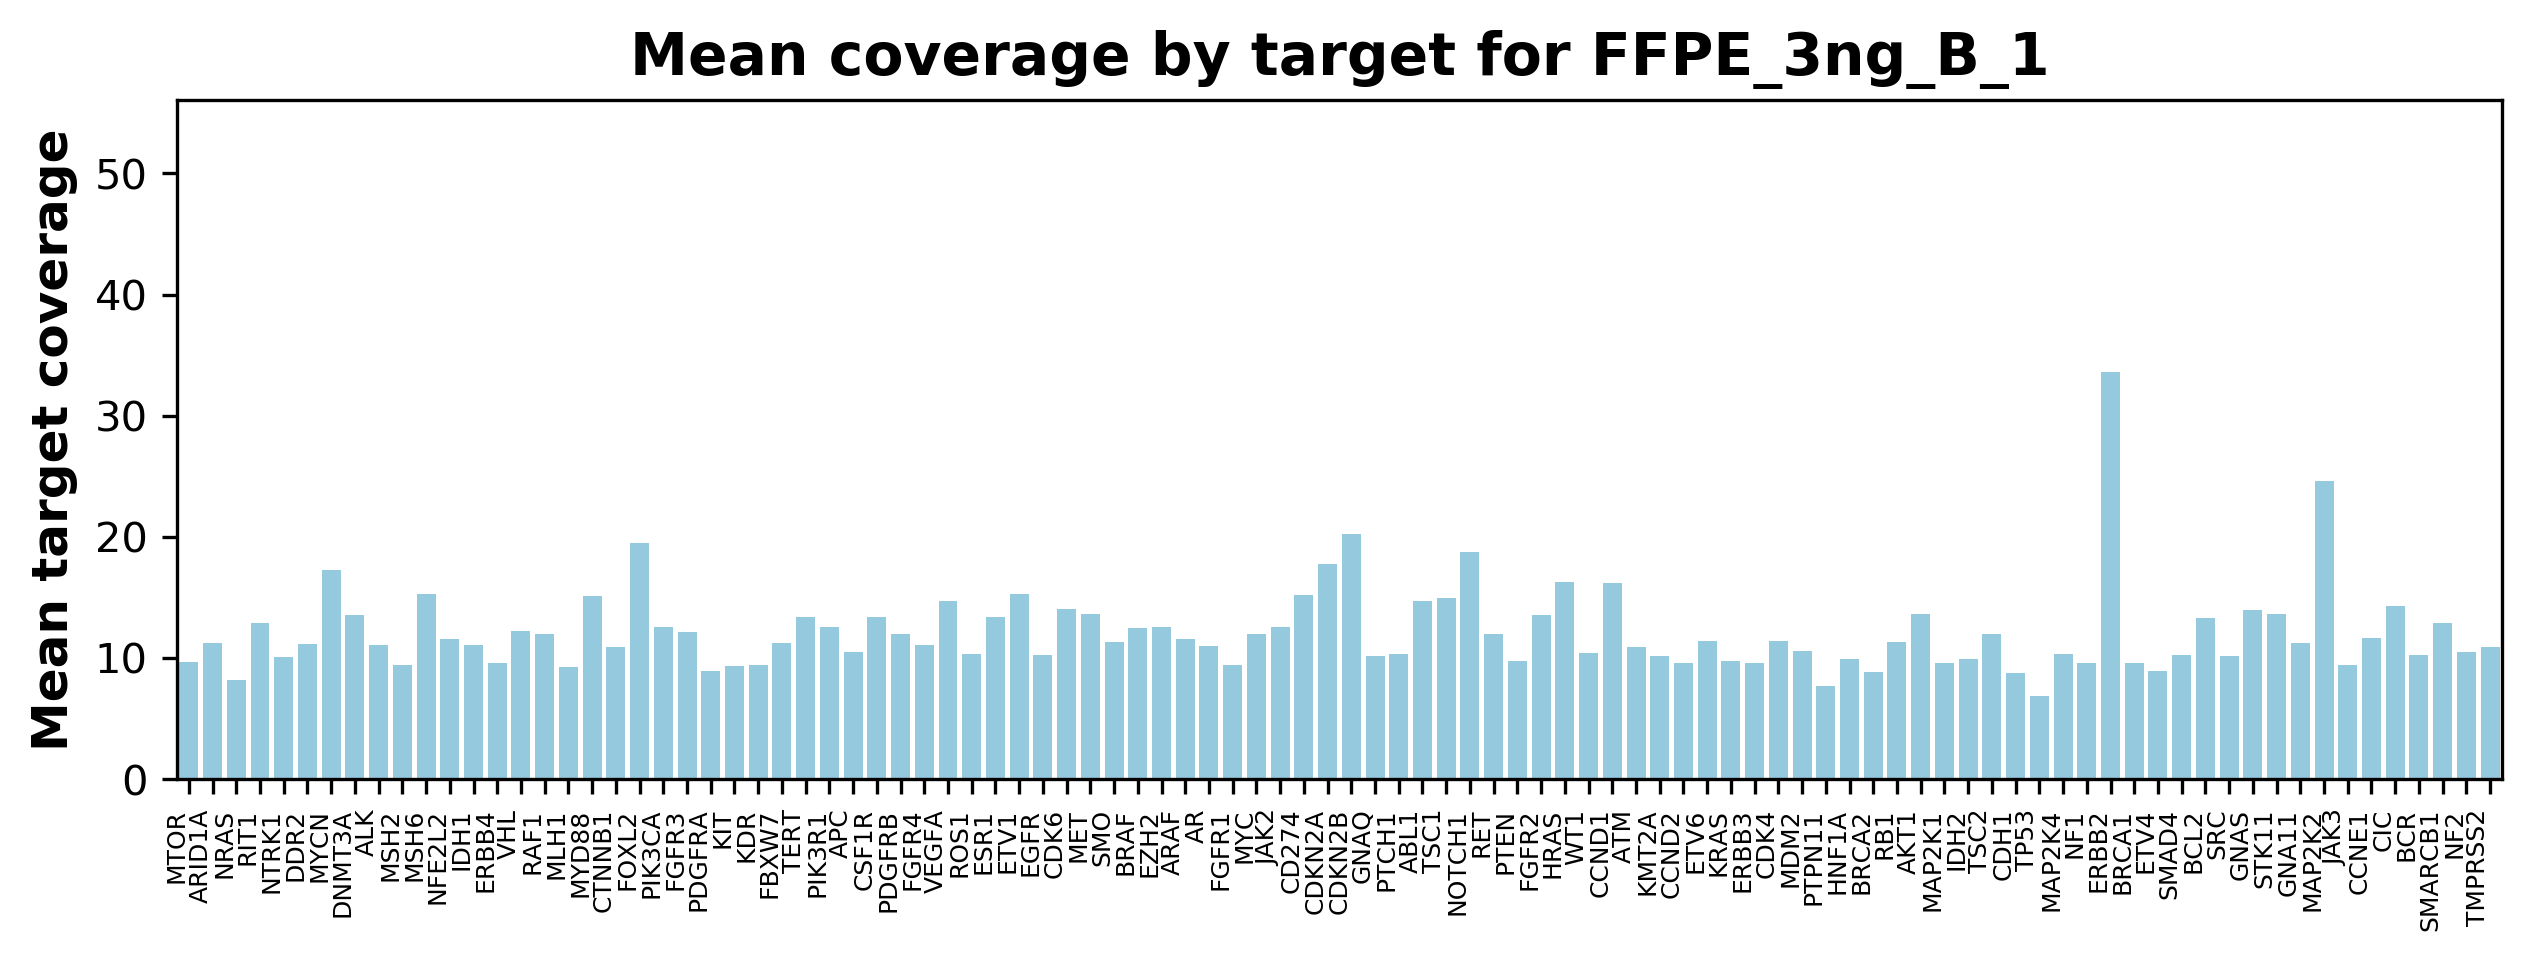

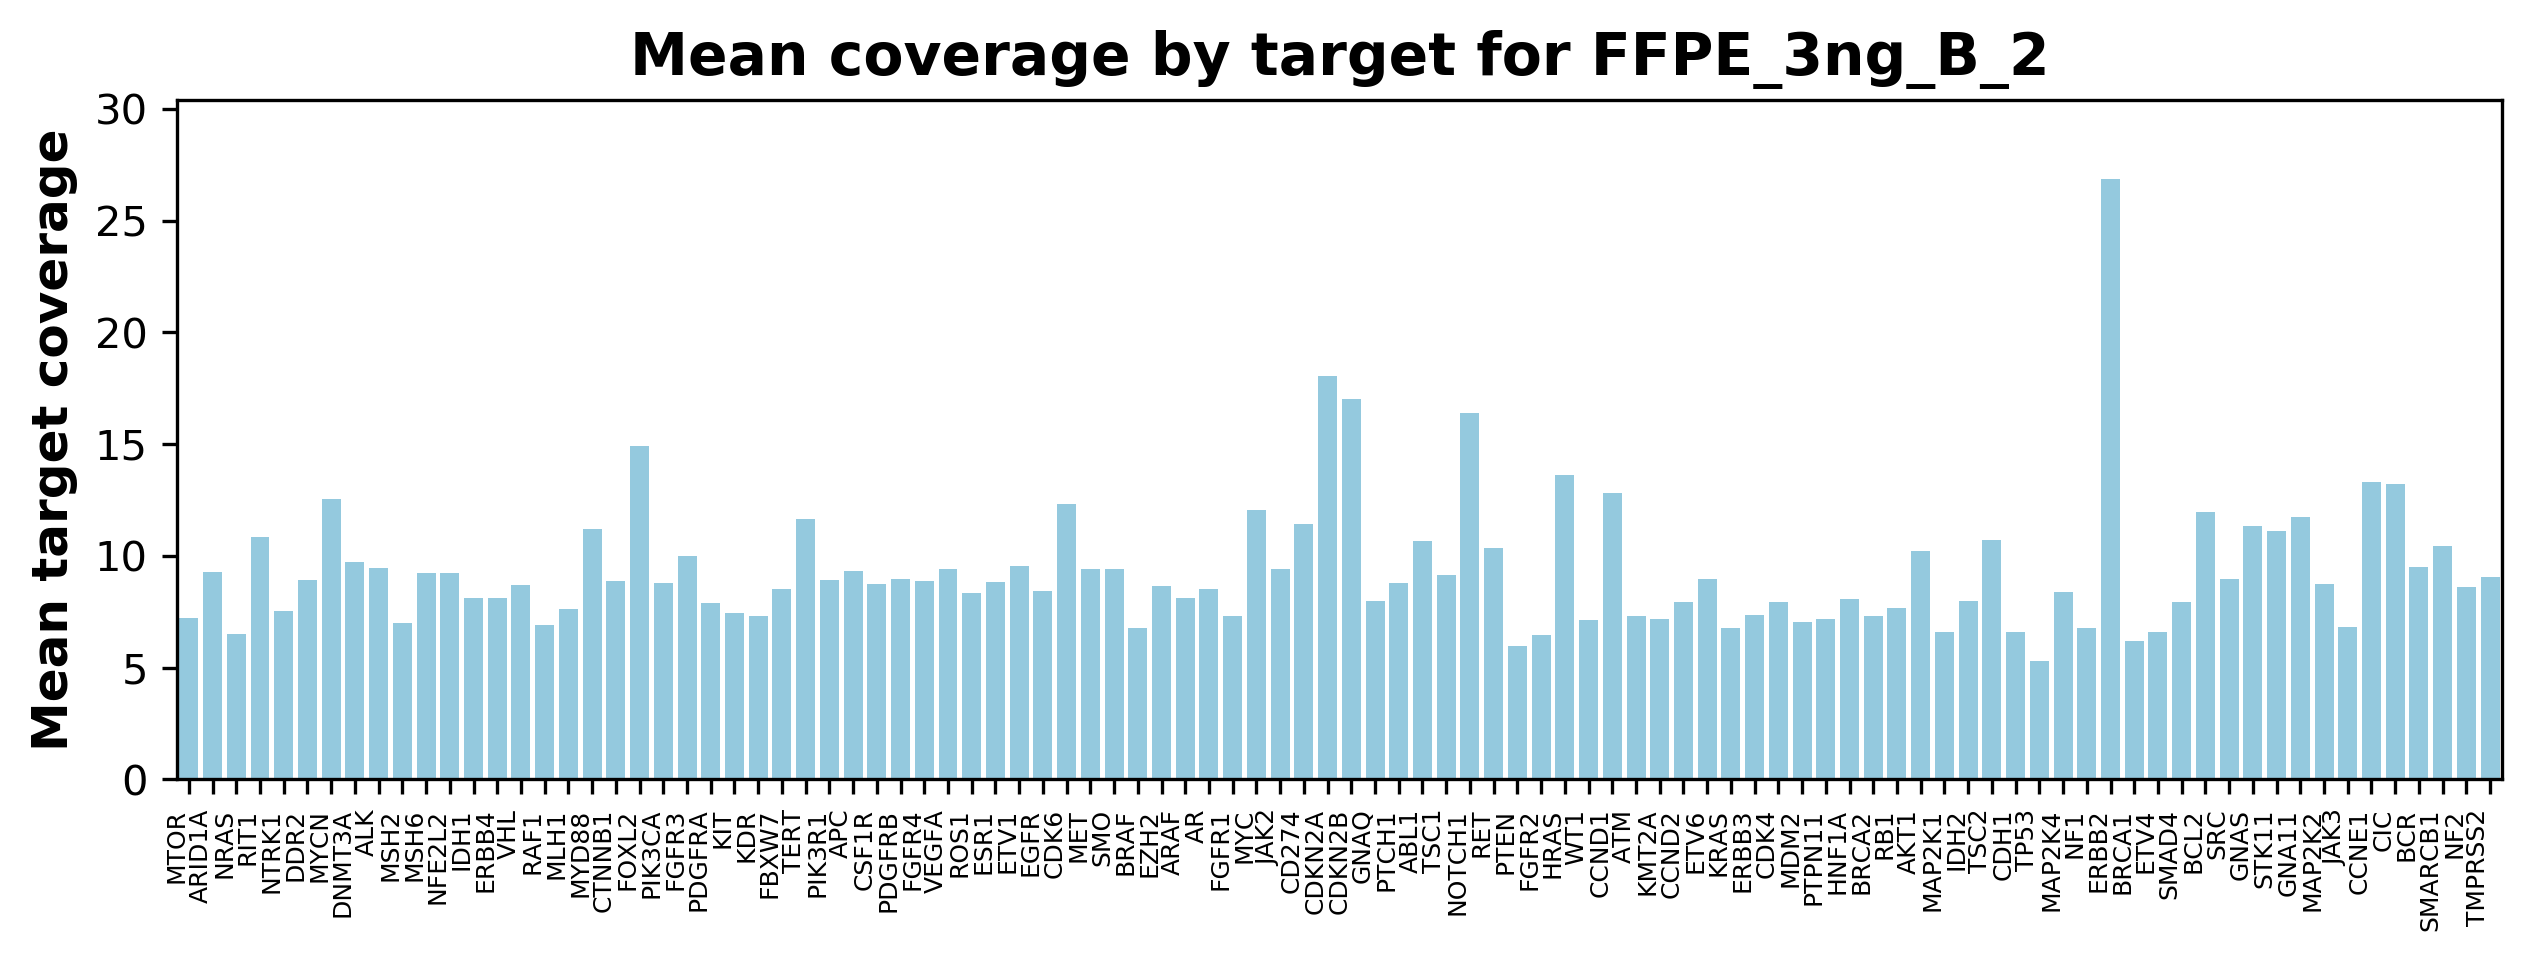

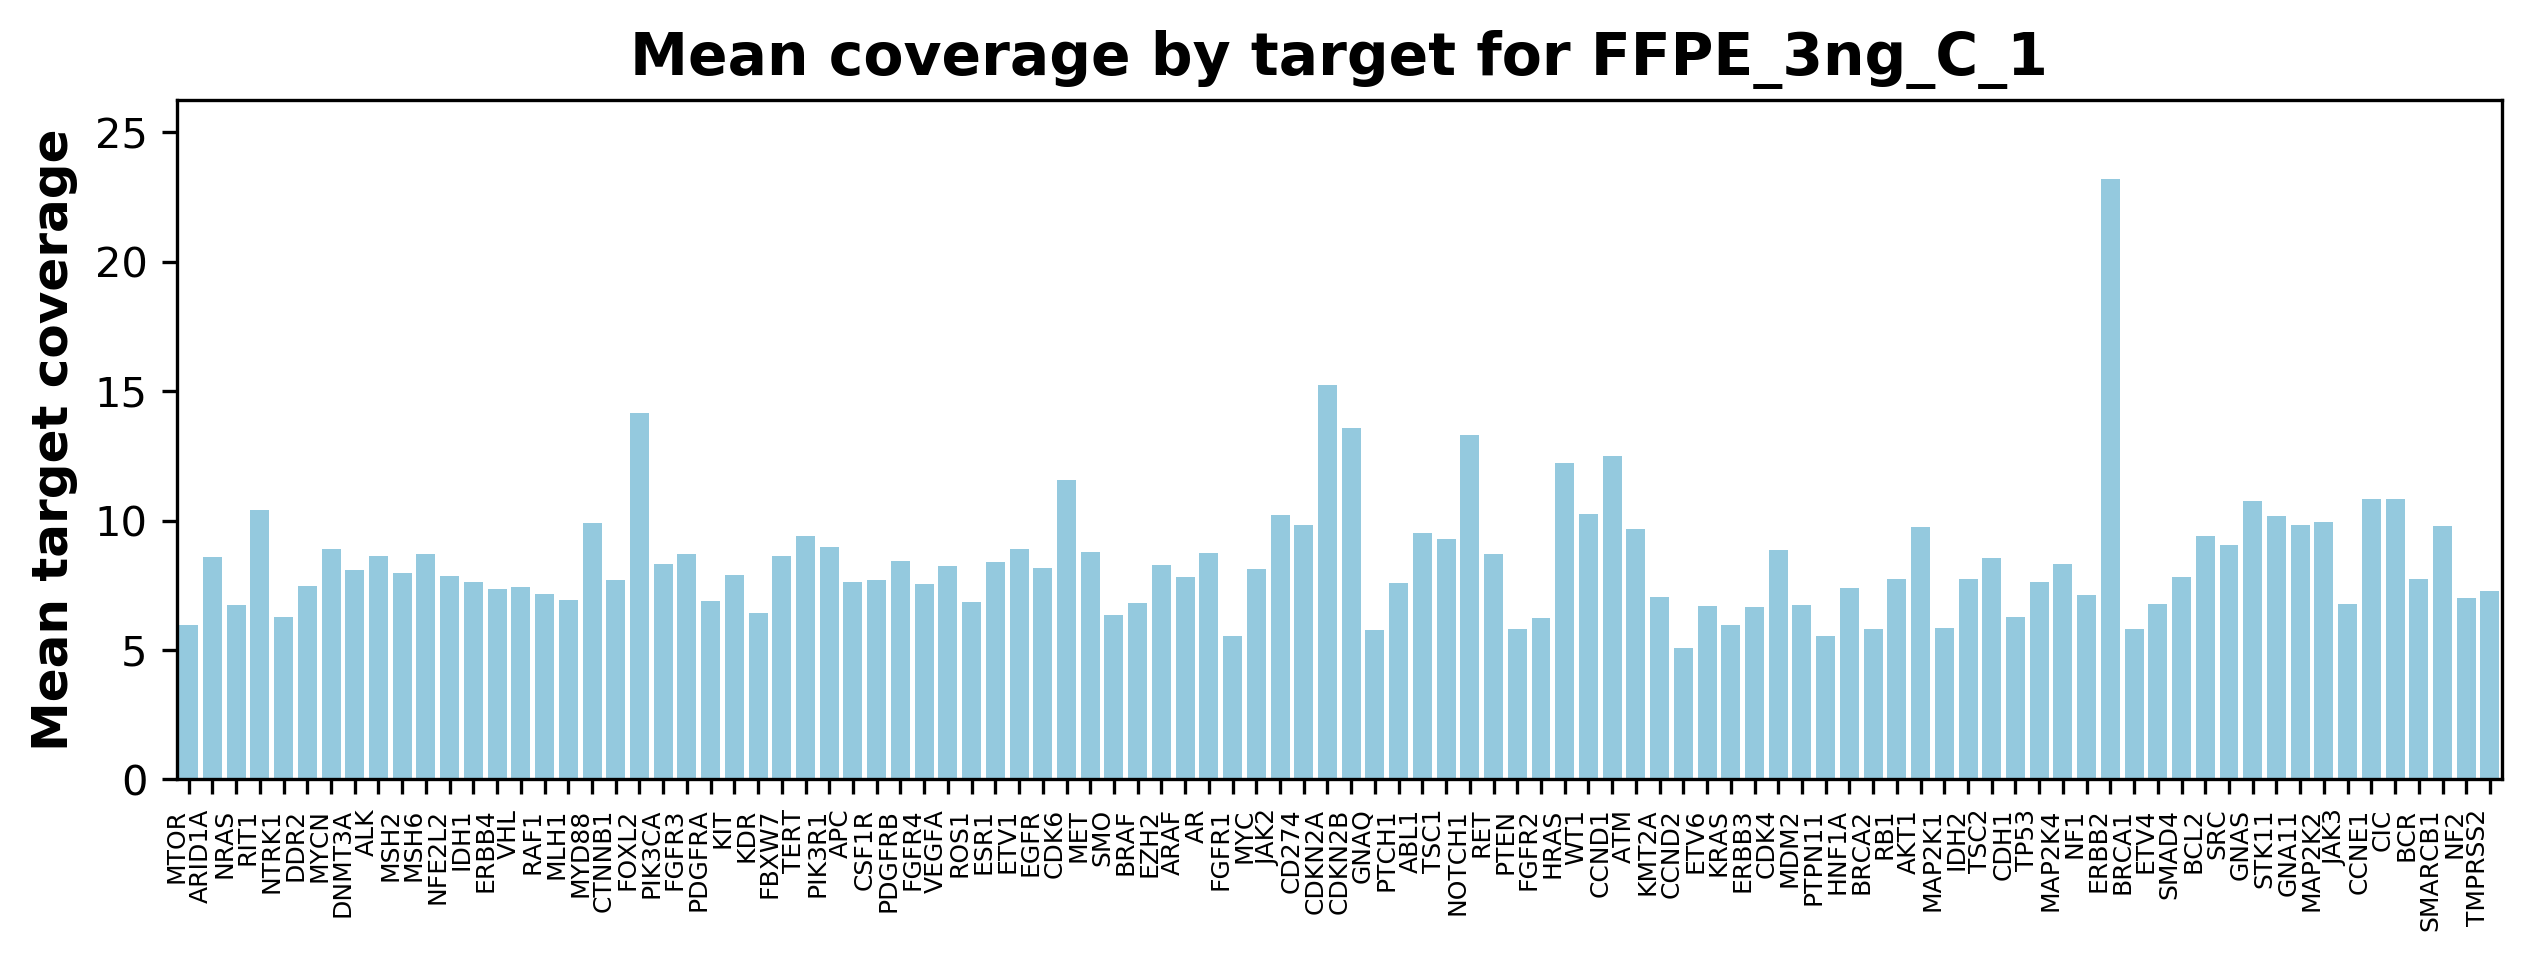

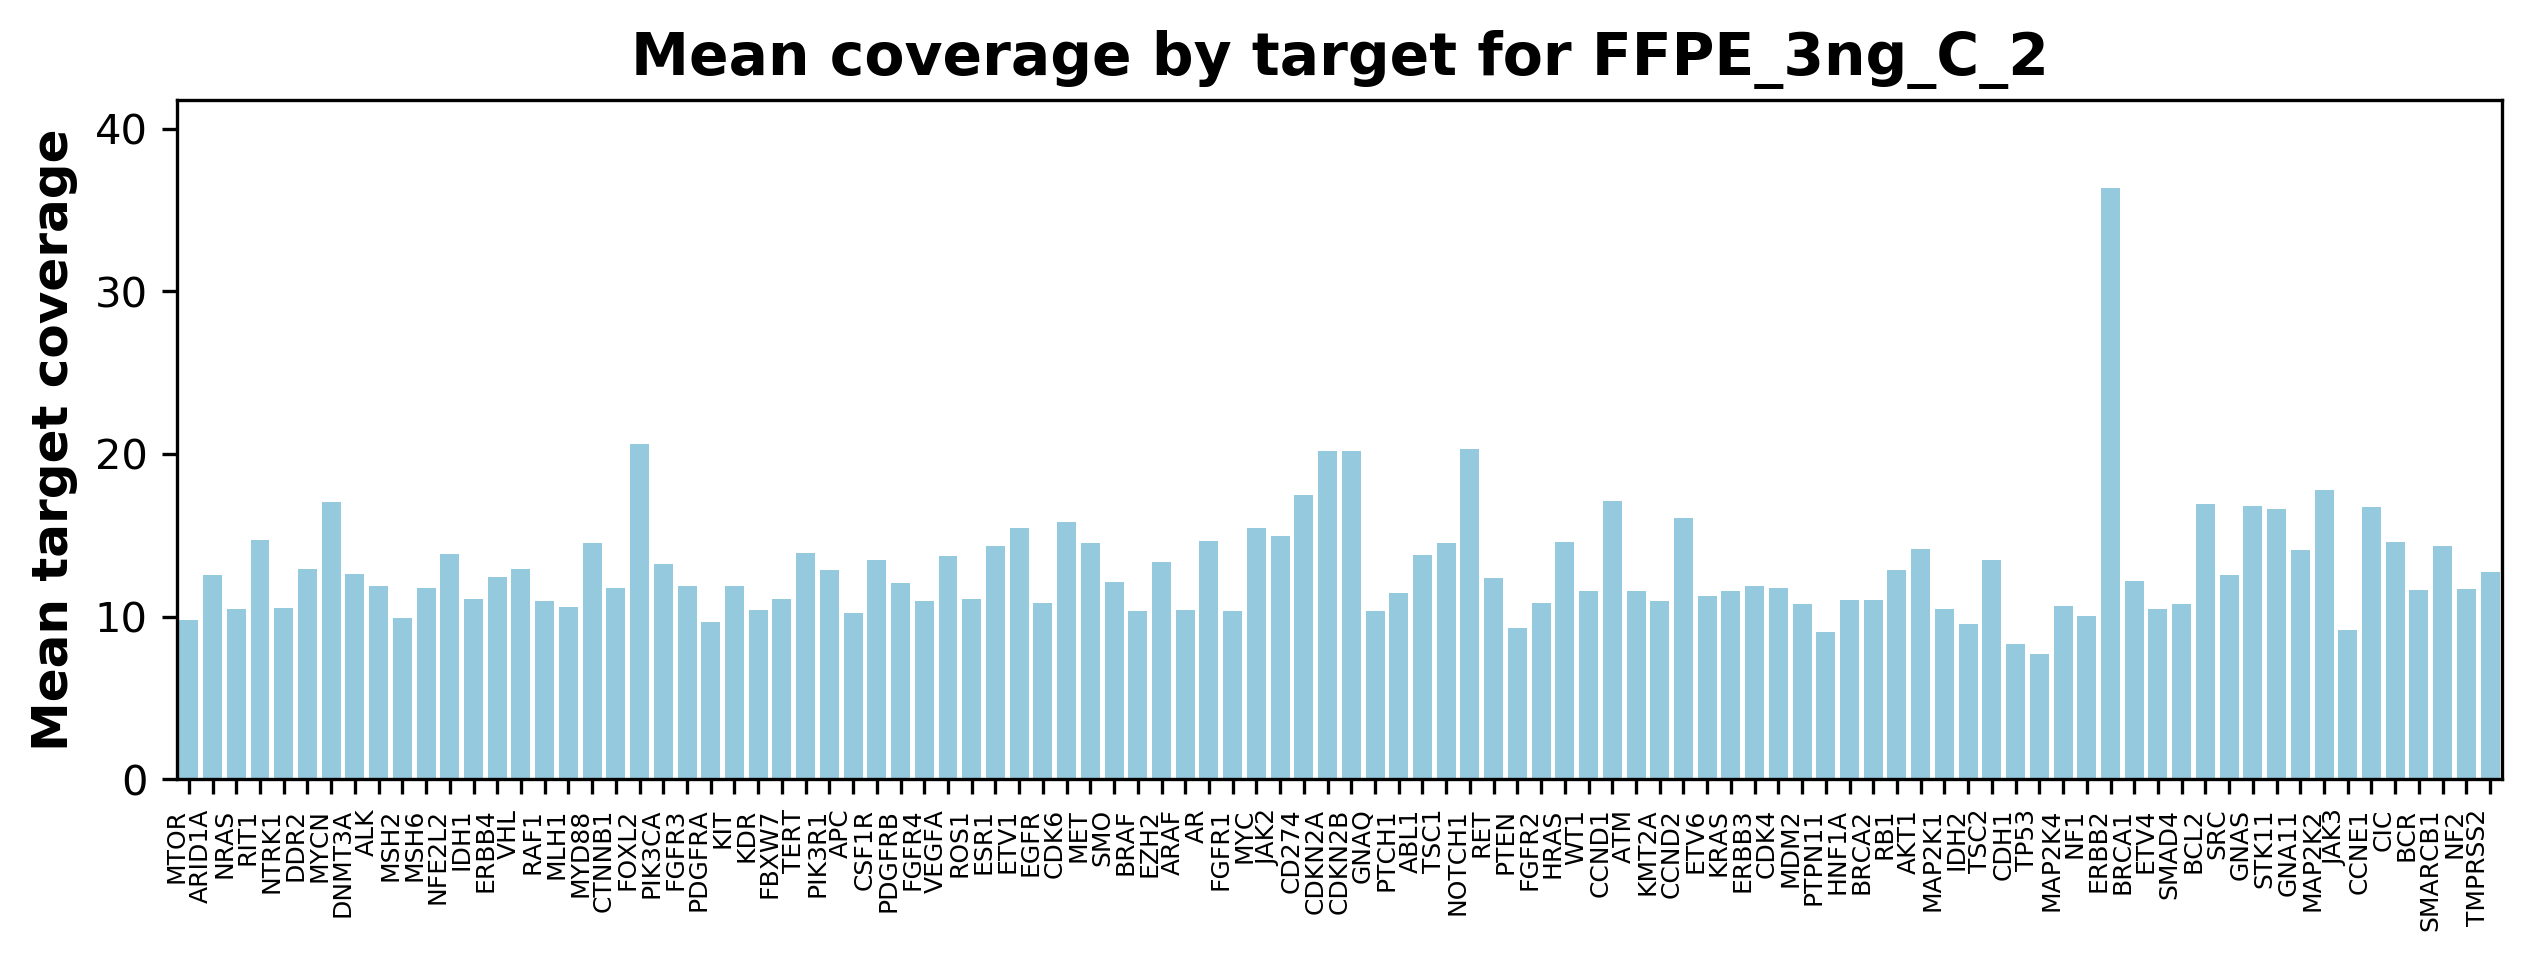

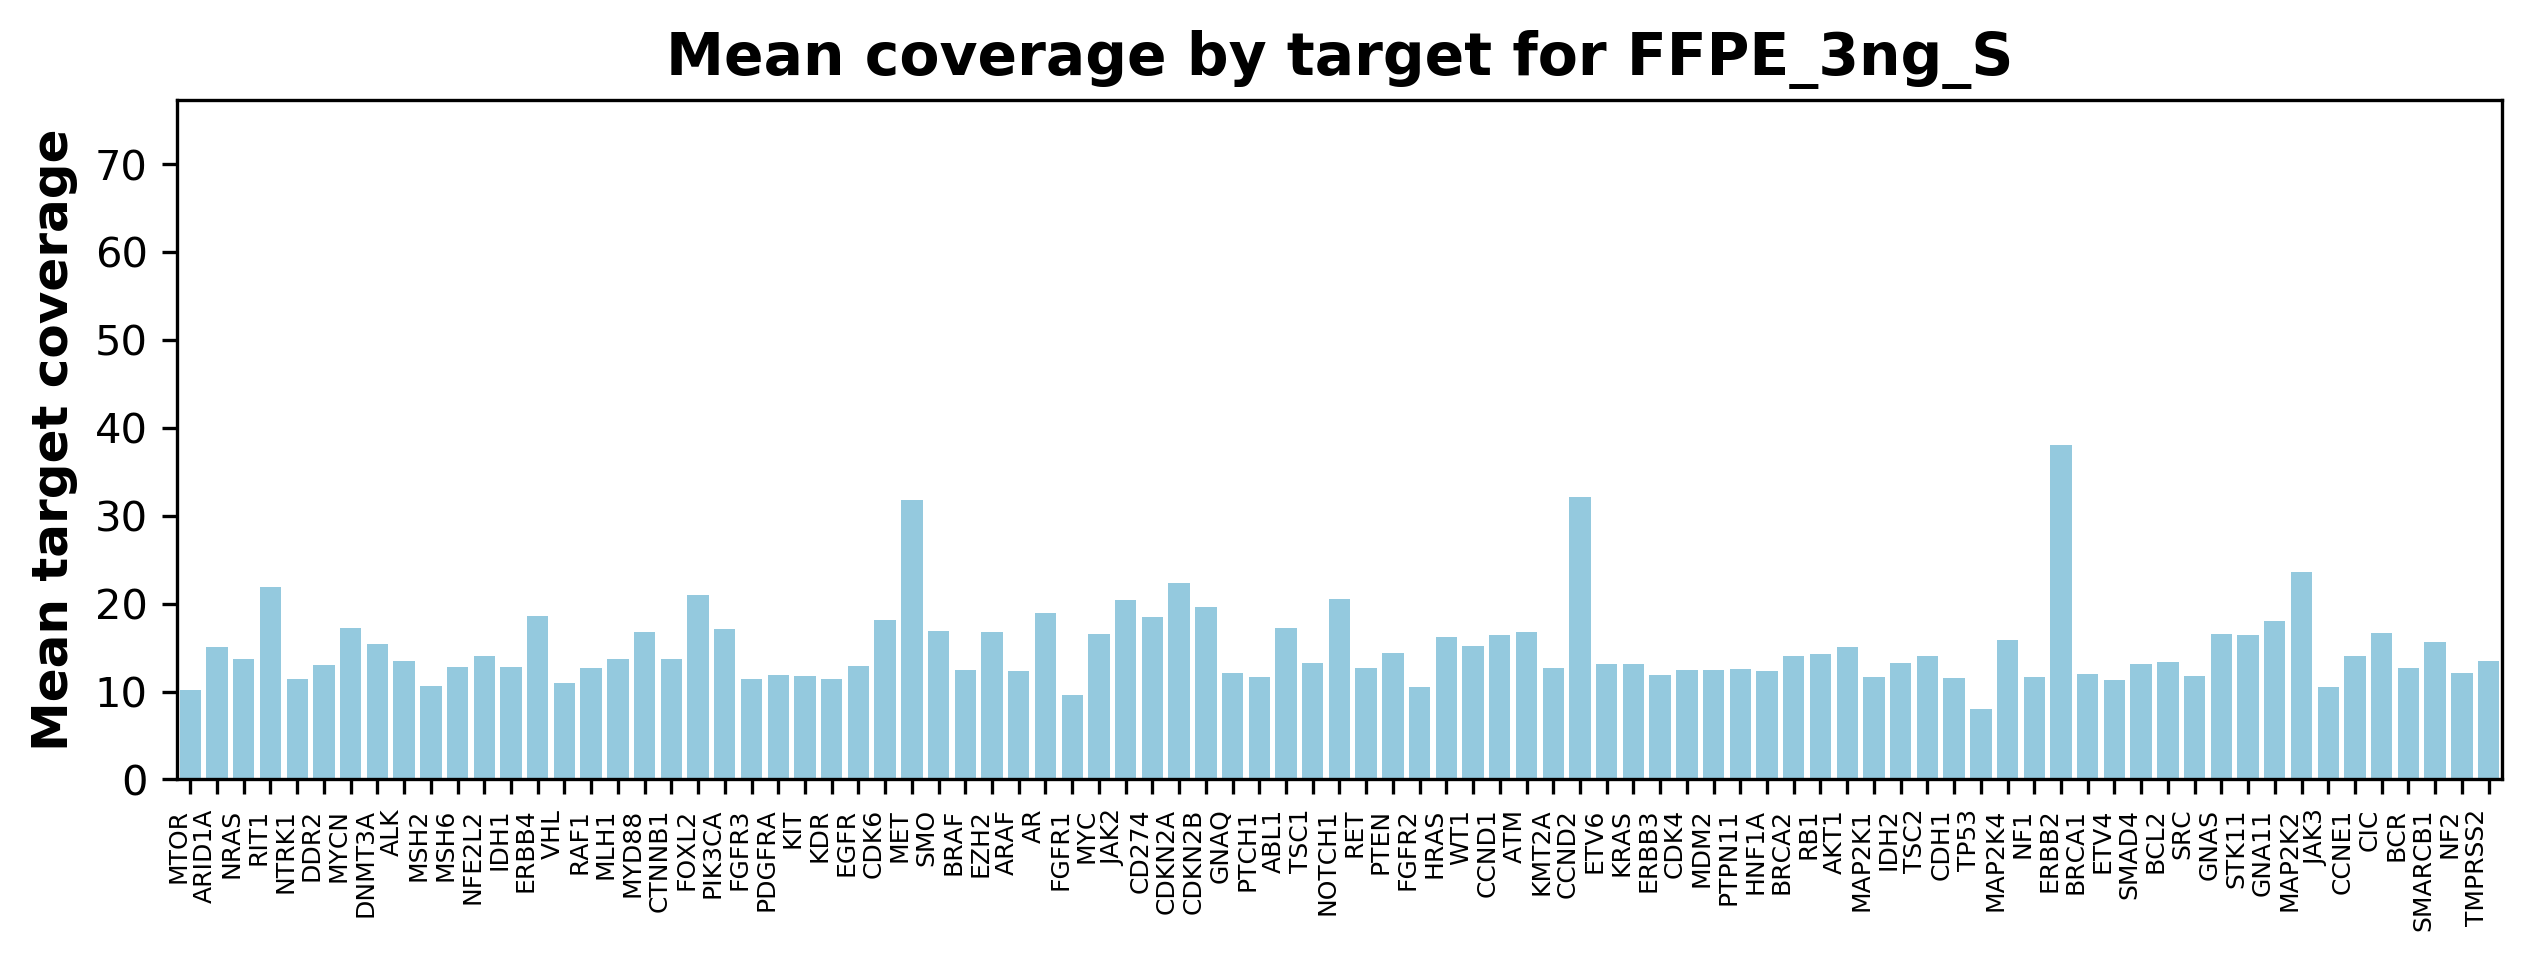

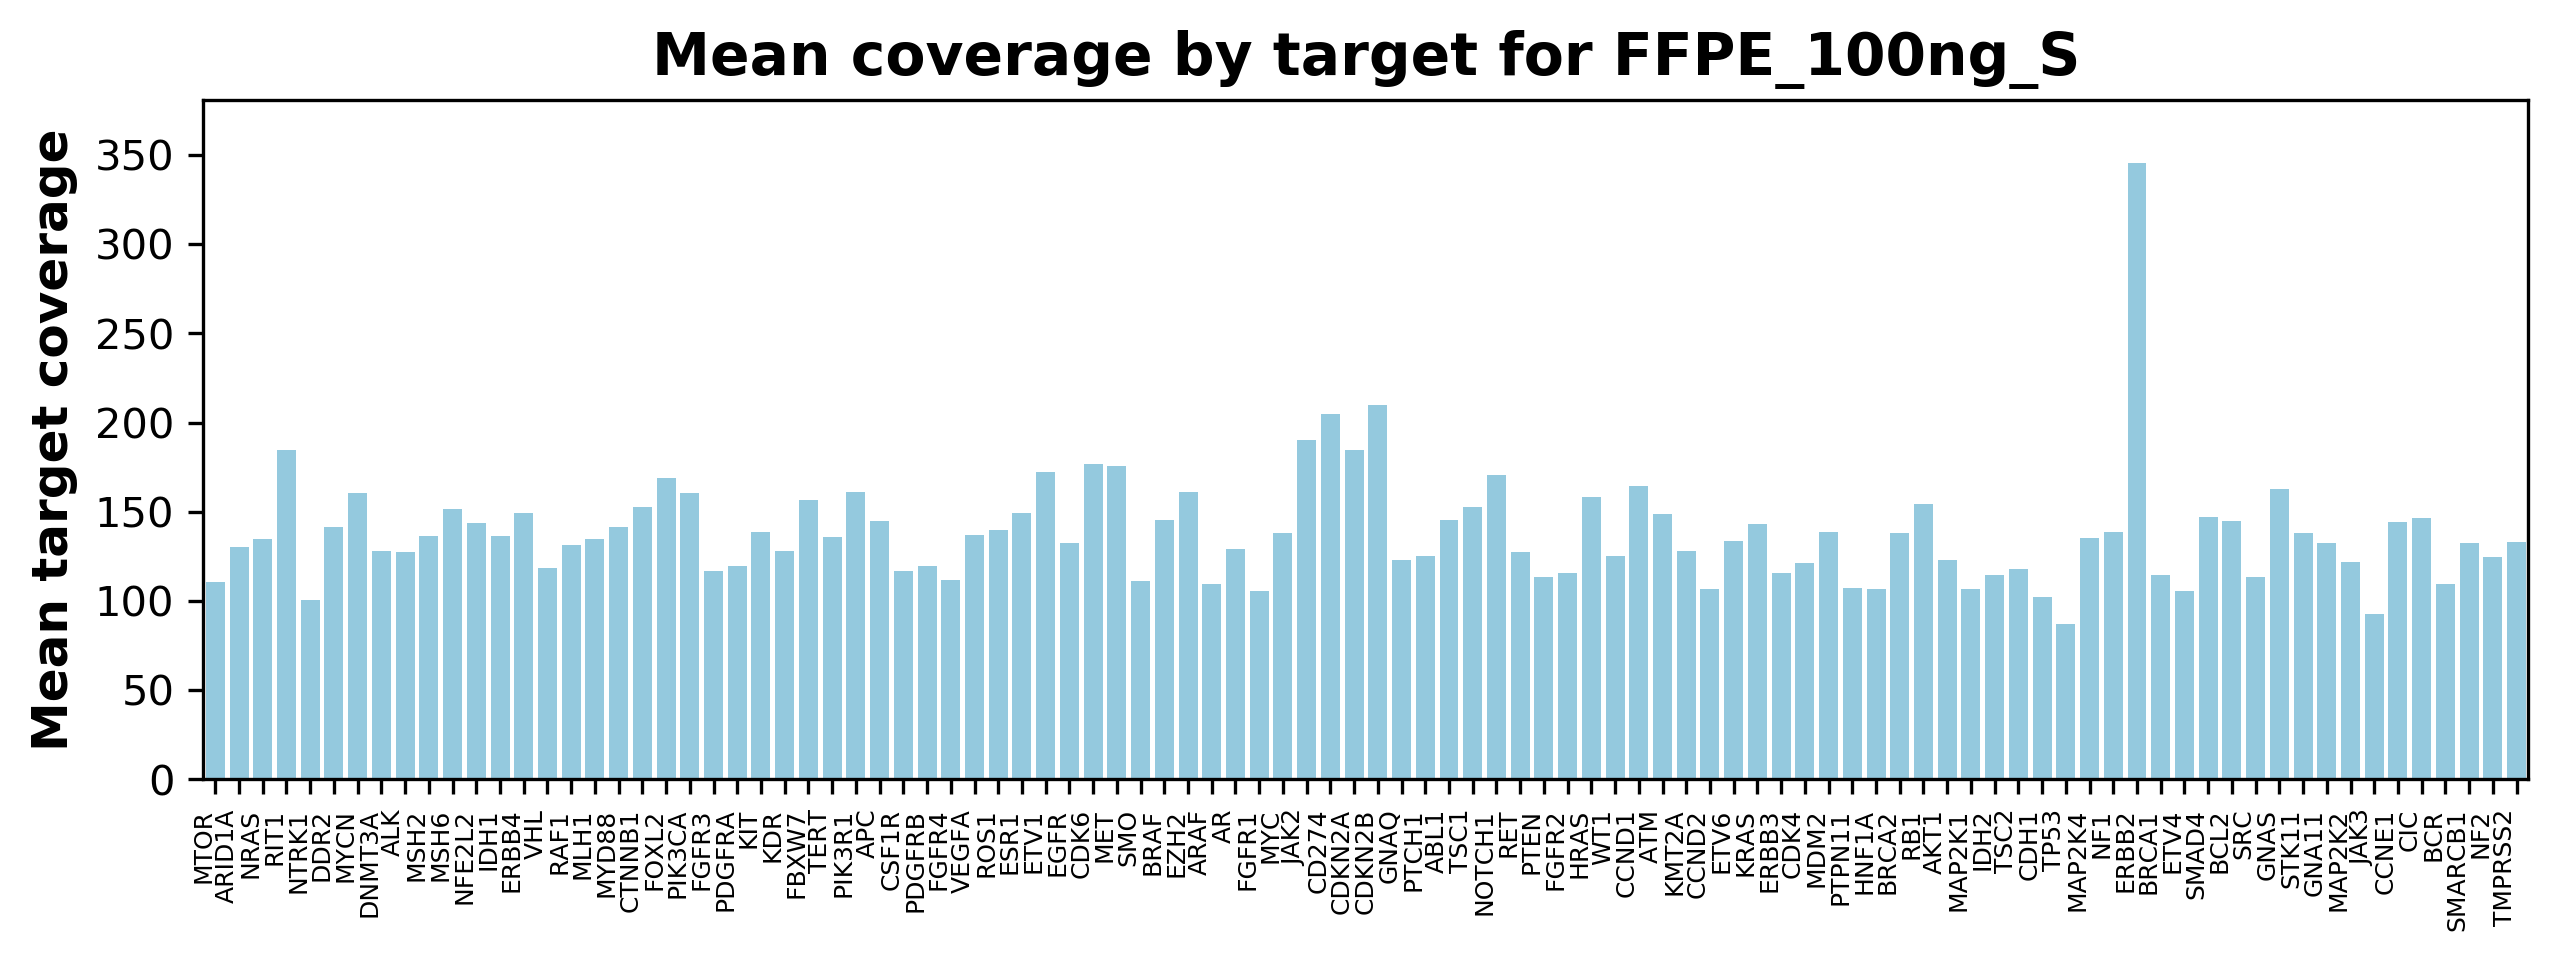

In [17]:
IDs=[]
mean_coverage=[]
target_names=[]

for ID in sample_names.keys():
    sample=pd.read_table('../data/{}_L001.HS.metrics.per_target.txt'.format(ID))
    names = sample['name']
    mean_target_coverage = sample['mean_coverage']
    sample['intron'] = [i.startswith('chr') for i in sample['name']]
    sample = sample[sample['intron'] != True]
    sample['name_adj'] = [i.strip('.').strip(',') for i in sample['name']]
    
    plt.figure(figsize=(10,3))
    sns.barplot(x='name_adj',
            y='mean_coverage',
            data=sample,
            errwidth=0,
            capsize=0,
            color='SkyBlue'
           )
    
    plt.xticks(rotation=90)
    plt.xticks(ha='right')
    plt.xlabel('')
    plt.ylabel('Mean target coverage',fontsize=12,fontweight='bold')

    plt.title('Mean coverage by target for {}'.format(sample_names[ID]),fontsize='14',fontweight='bold')

    plt.tick_params(axis='x', which='major', labelsize=6)
    
    plt.show()
    
    IDs.extend([(sample_names[ID])]*len(names))
    mean_coverage.extend(mean_target_coverage)
    target_names.extend(names)
    
df = pd.DataFrame(columns=['sample','name','mean coverage'])
df['sample'] = IDs
df['name'] = target_names
df['mean coverage'] = mean_coverage

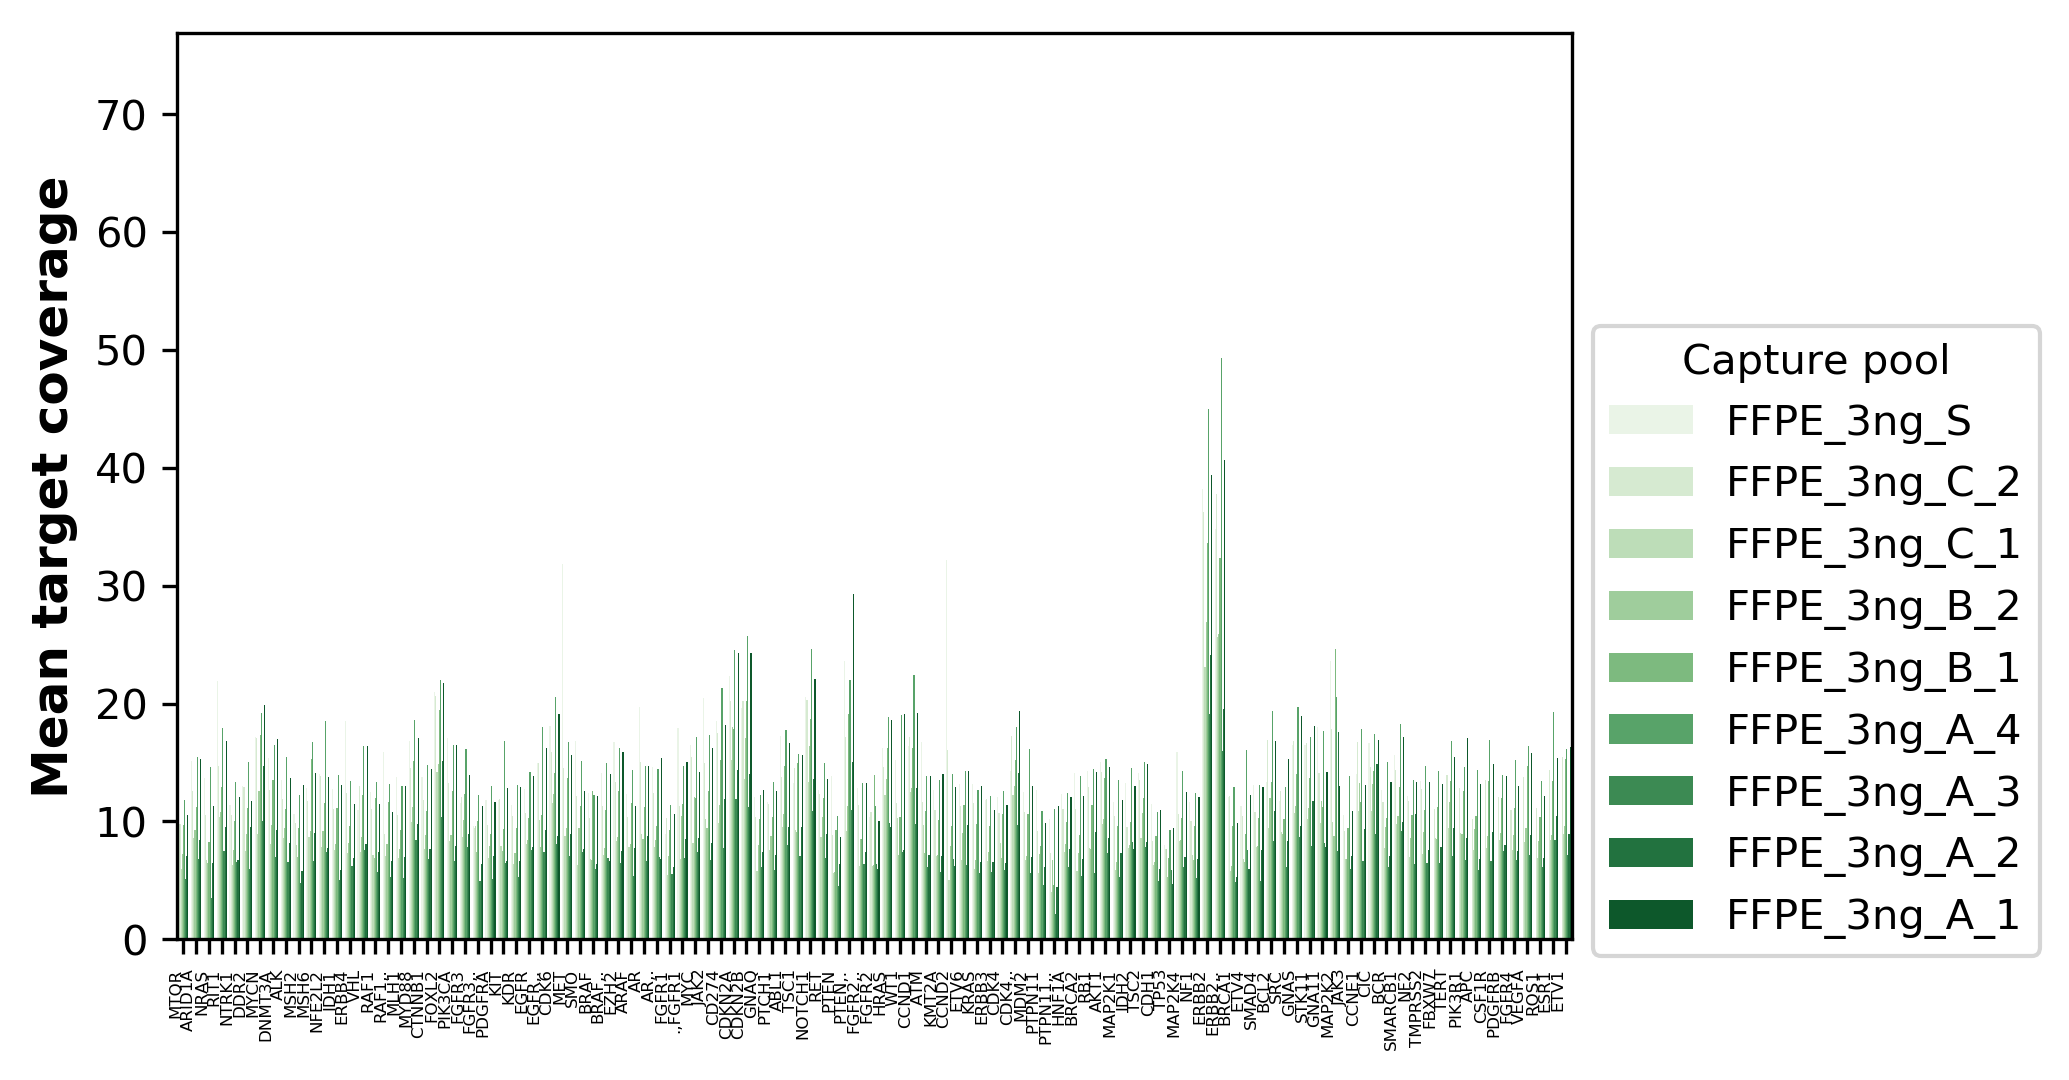

In [159]:
sns.barplot(x='name',
            y='mean coverage',
            data=df,
            hue='sample',
            errwidth=0,
            capsize=0,
            palette='Greens'
           )
plt.xticks(rotation=90)
plt.xticks(ha='right')
plt.xlabel('')
plt.ylabel('Mean target coverage',fontsize=12,fontweight='bold')

plt.title('',fontsize='14',fontweight='bold')

plt.tick_params(axis='x', which='major', labelsize=4)
plt.legend(title='Capture pool',bbox_to_anchor=(1., .7))

In [25]:
summary_df = pd.read_csv('../data/summary.csv',index_col=0)

In [42]:
summary_df['ID'] = [sample_names[i] for i in summary_df.index]
summary_df = summary_df.sort_values(by='ID',ascending=True)
summary_df['order'] = [10,1,2,3,4,5,6,7,8,9]

In [82]:
summary_df = summary_df.sort_values(by='order',ascending=True)
summary_df['% of reads on target'] = summary_df['PCT_SELECTED_BASES'] 
summary_df['capture'] = ['A (5 samples)',
                         'A (5 samples)',
                         'A (5 samples)',
                         'A (5 samples)',
                         'B (2 samples)',
                         'B (2 samples)',
                         'C (2 samples)',
                         'C (2 samples)',
                         'S (1 sample)',
                         'S (1 sample)']

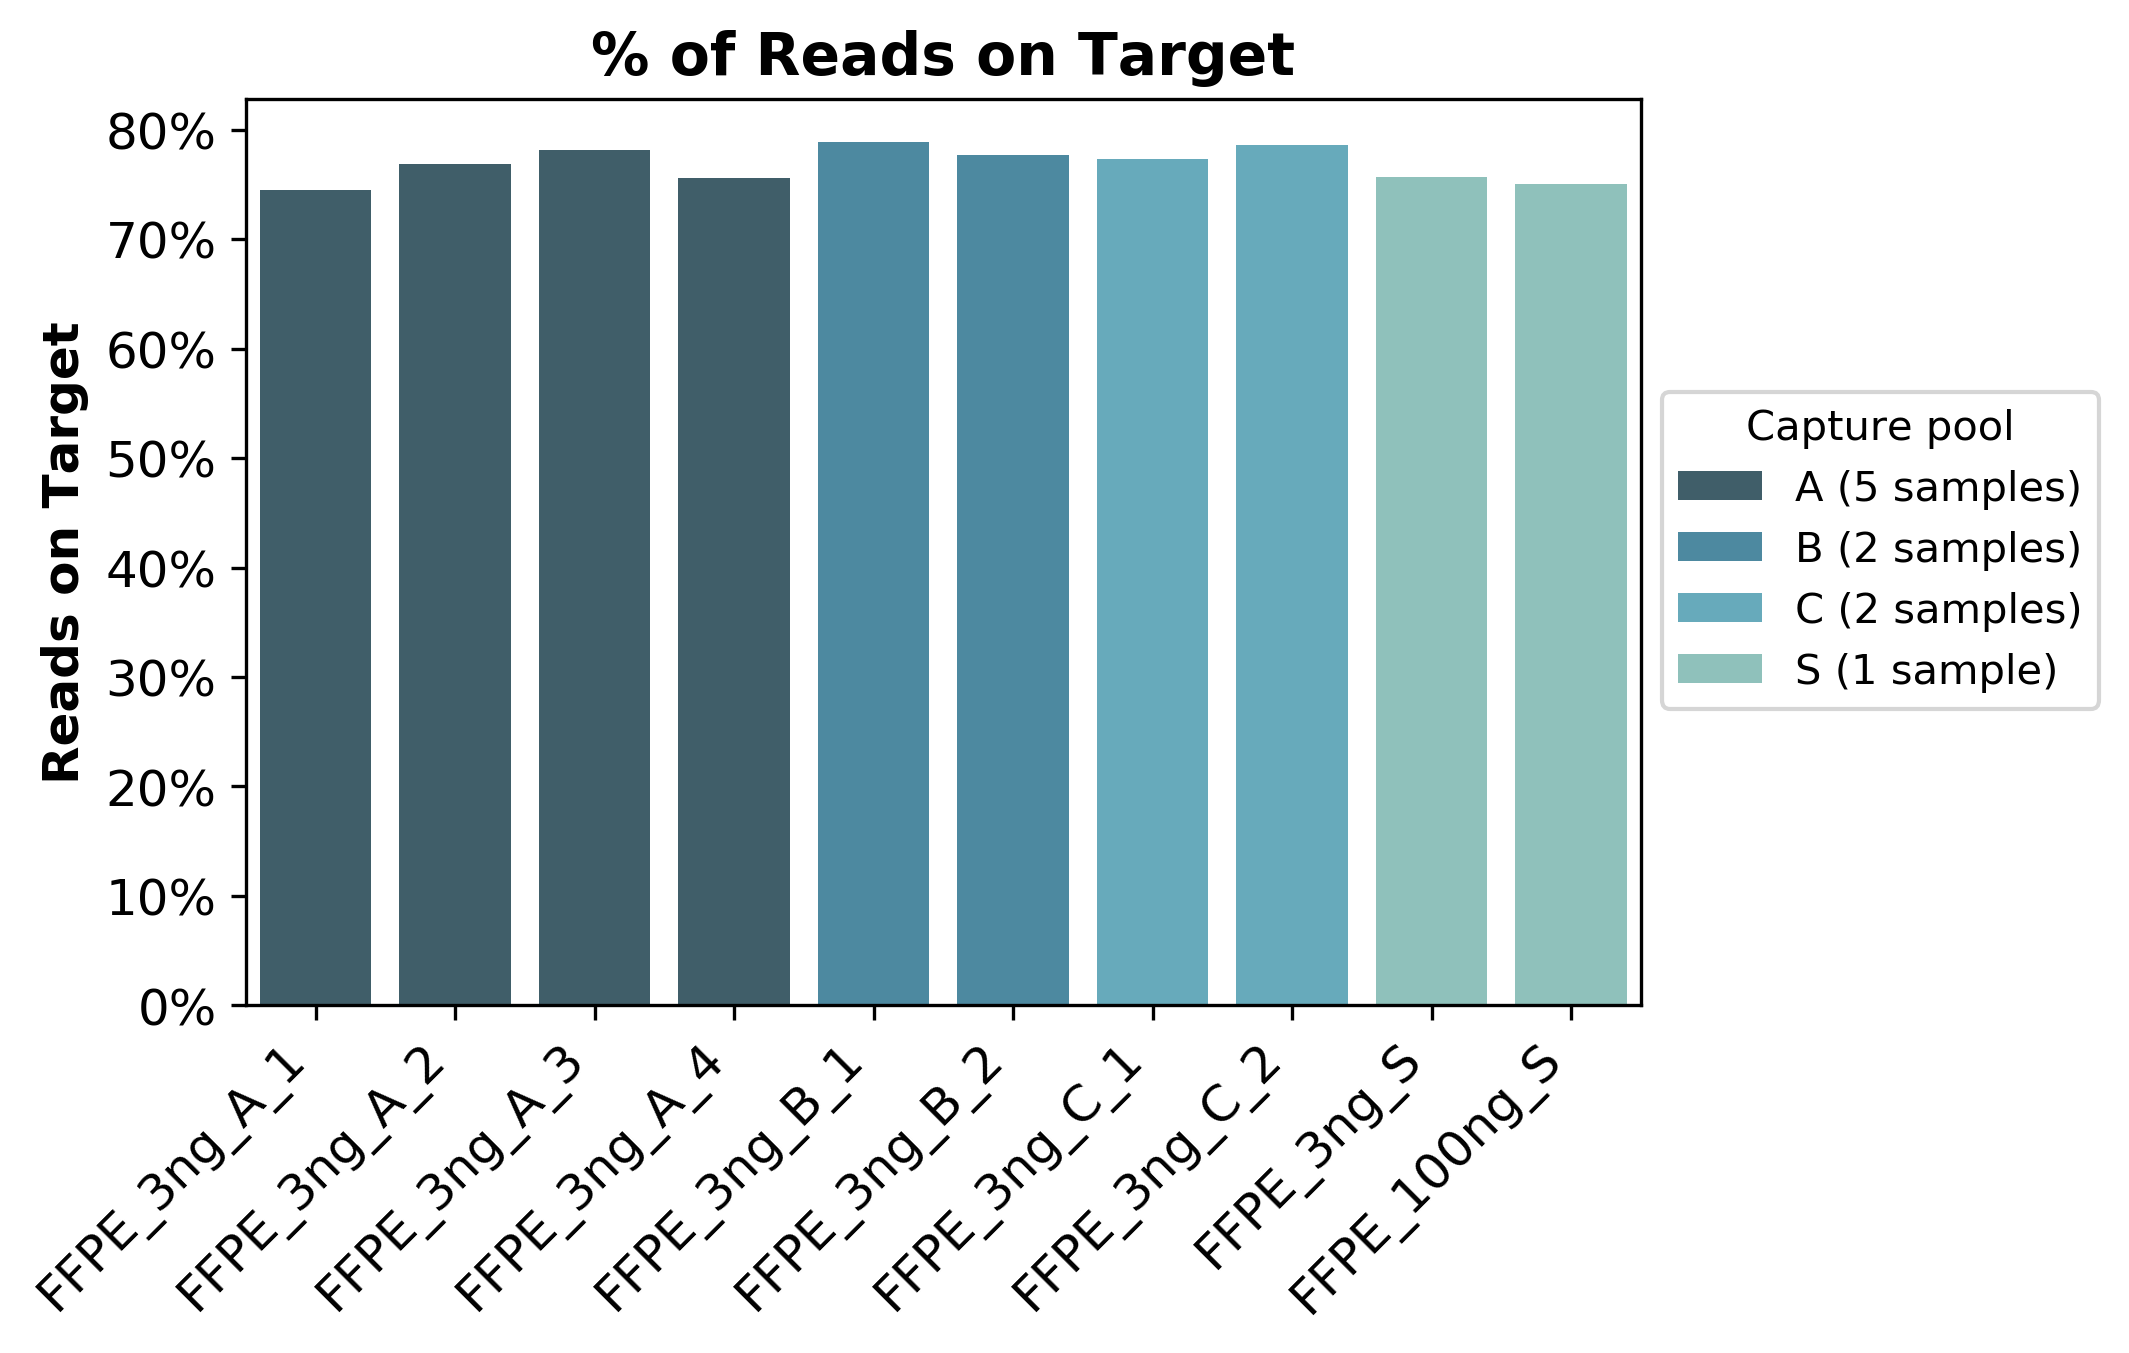

In [102]:
sns.barplot(x='ID',
            y='% of reads on target',
            data=summary_df,
            palette="GnBu_d",
            hue='capture',
            dodge=False
           )
plt.xticks(rotation=45)
plt.xticks(ha='right')
plt.xlabel('')
plt.ylabel('Reads on Target',fontsize=12,fontweight='bold')

plt.title('% of Reads on Target',fontsize='14',fontweight='bold')

plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.legend(title='Capture pool',bbox_to_anchor=(1., .7))
plt.tick_params(axis='both', which='major', labelsize=12)

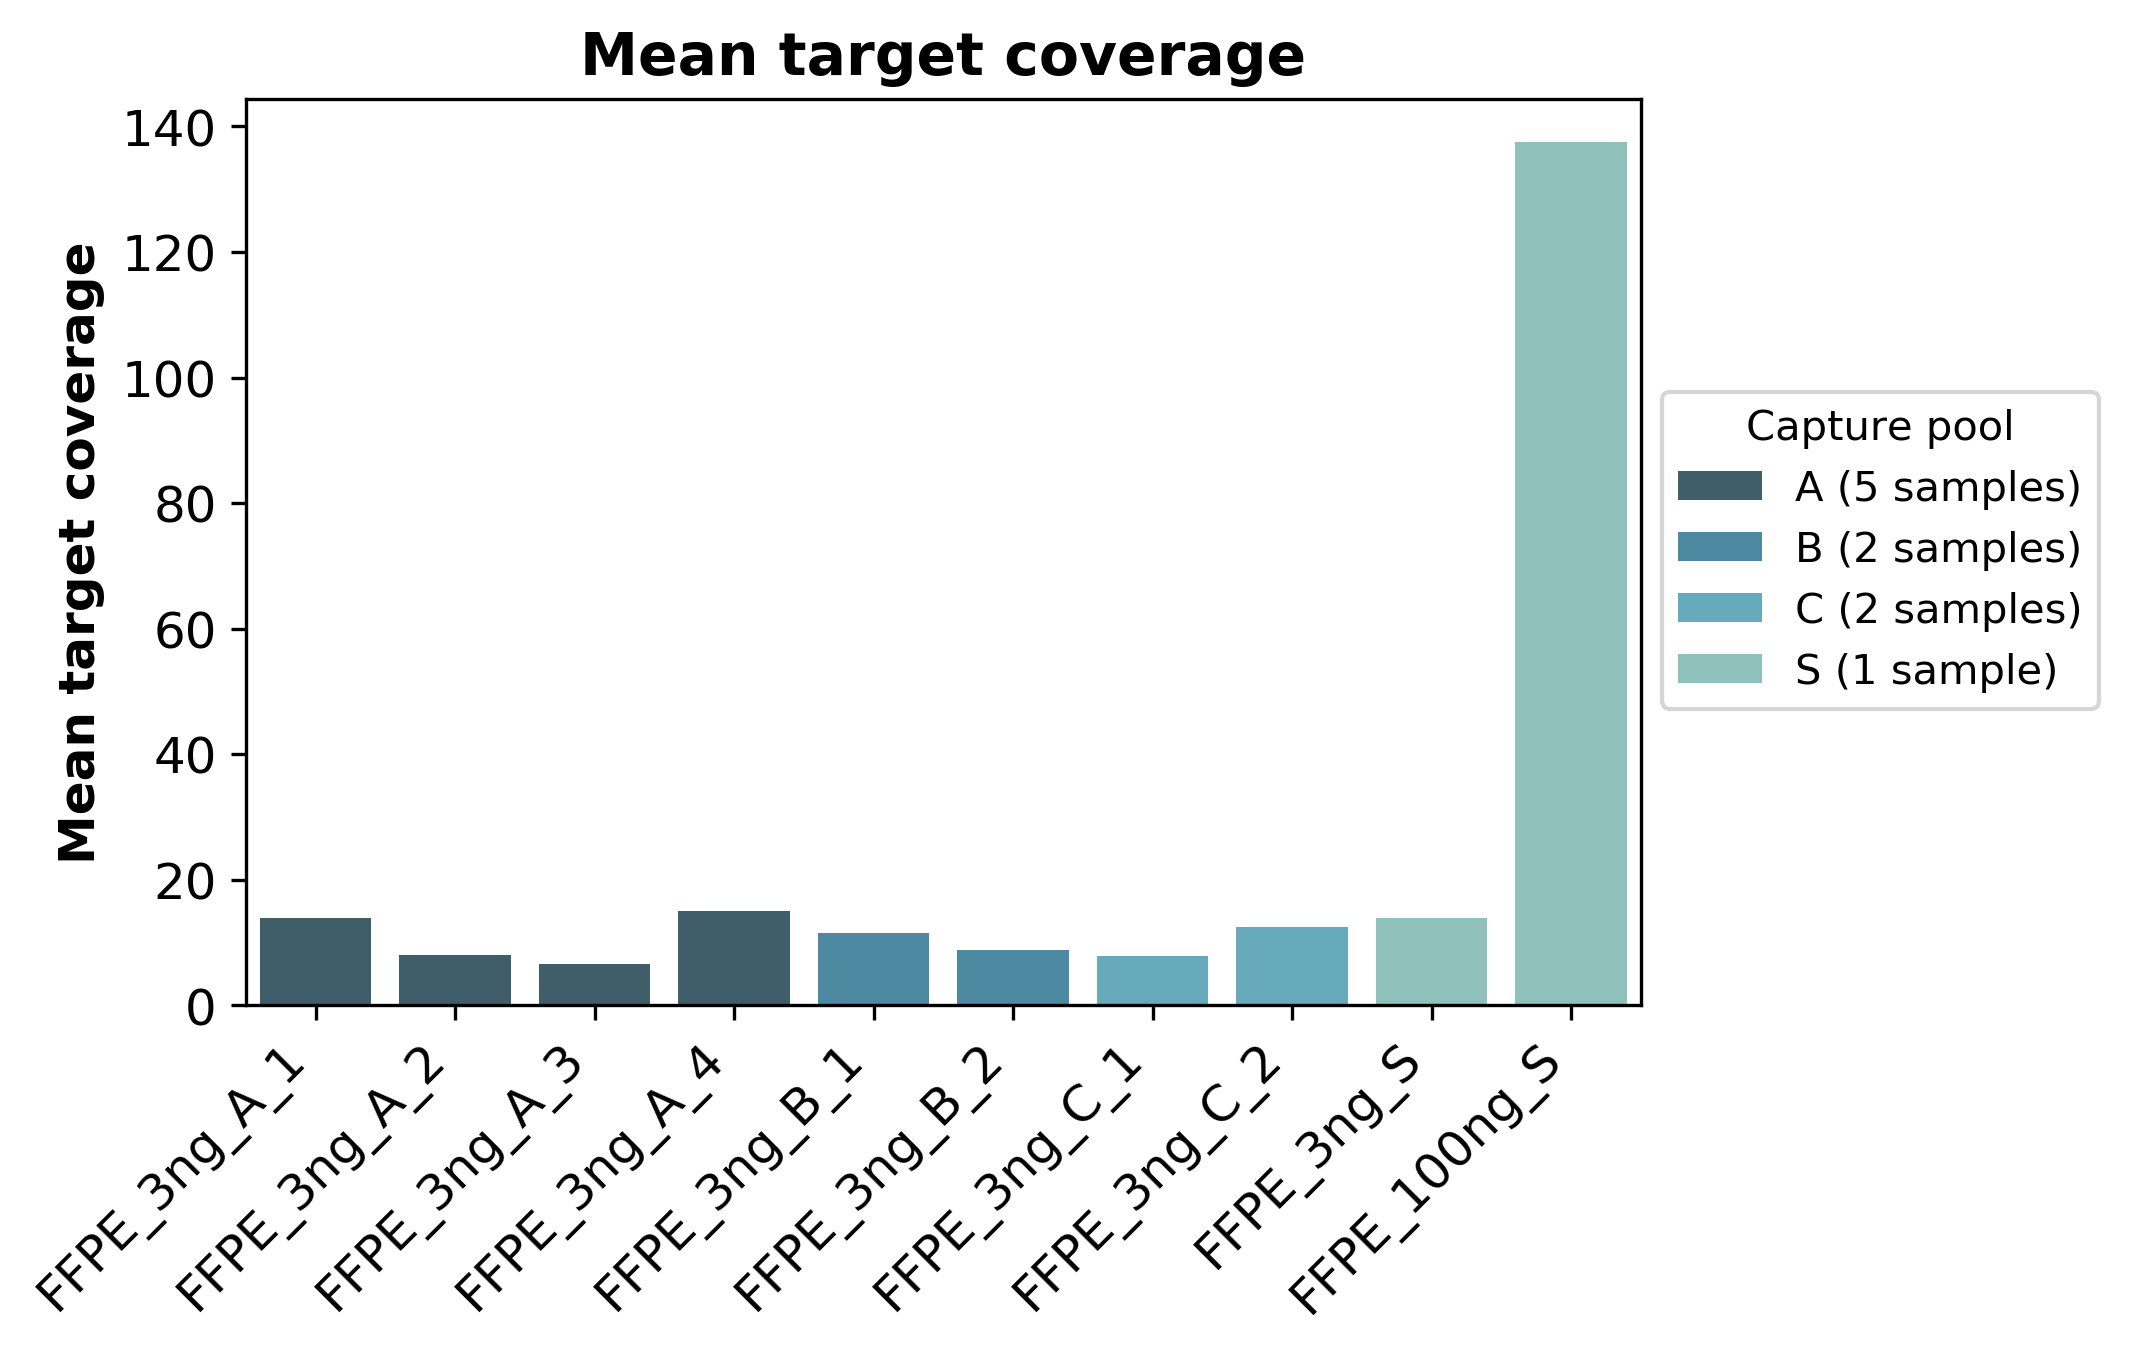

In [146]:
sns.barplot(x='ID',
            y='MEAN_TARGET_COVERAGE',
            data=summary_df,
            palette="GnBu_d",
            hue='capture',
            dodge=False
           )
plt.xticks(rotation=45)
plt.xticks(ha='right')
plt.xlabel('')
plt.ylabel('Mean target coverage',fontsize=12,fontweight='bold')

plt.title('Mean target coverage',fontsize='14',fontweight='bold')

plt.legend(title='Capture pool',bbox_to_anchor=(1., .7))
plt.tick_params(axis='both', which='major', labelsize=12)

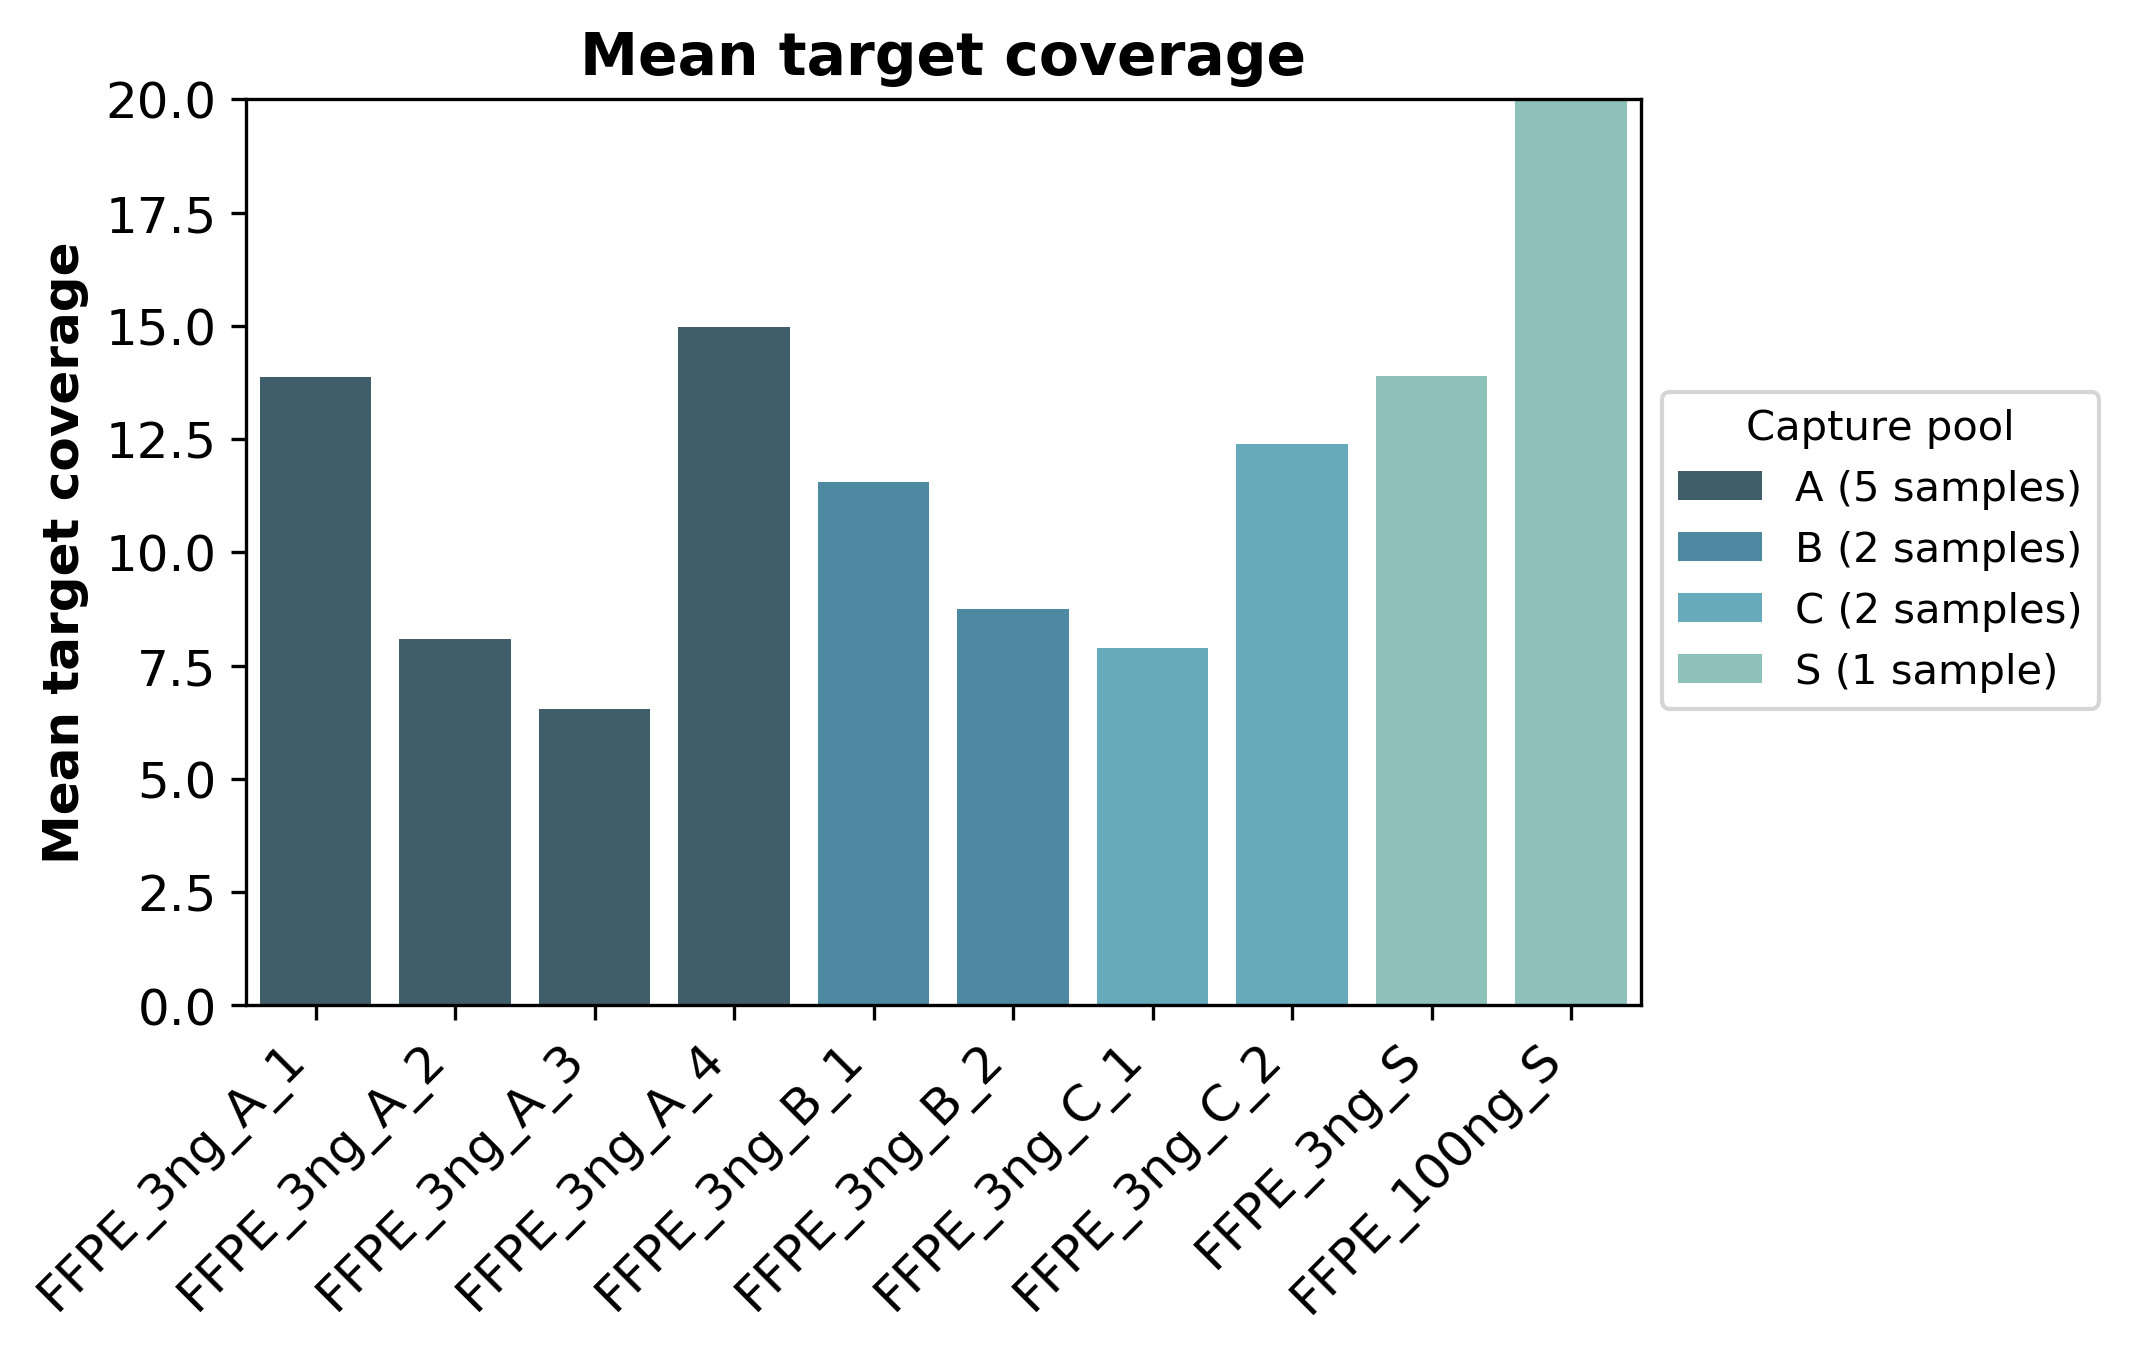

In [147]:
sns.barplot(x='ID',
            y='MEAN_TARGET_COVERAGE',
            data=summary_df,
            palette="GnBu_d",
            hue='capture',
            dodge=False
           )
plt.xticks(rotation=45)
plt.xticks(ha='right')
plt.xlabel('')
plt.ylabel('Mean target coverage',fontsize=12,fontweight='bold')
plt.ylim(0,20)

plt.title('Mean target coverage',fontsize='14',fontweight='bold')

plt.legend(title='Capture pool',bbox_to_anchor=(1., .7))
plt.tick_params(axis='both', which='major', labelsize=12)

In [199]:
IDs=[]
coverage=[]
cum_frac=[]

for ID in sample_names.keys():
    sample=pd.read_table('../data/{}_L001.HS.metrics.txt'.format(ID),
                        skiprows=10)
    sample['frac'] = sample['high_quality_coverage_count']/sum(sample['high_quality_coverage_count'])
    sample['cum_frac'] = [1-sum(sample['frac'][0:i]) for i in sample.index]
    
    IDs.extend([sample_names[ID]]*len(sample['frac']))
    coverage.extend(sample['coverage_or_base_quality'])
    cum_frac.extend(sample['cum_frac'])
    
df = pd.DataFrame(columns=['sample','coverage','cum_frac'])
df['Sample'] = IDs
df['coverage'] = coverage
df['cum_frac'] = cum_frac

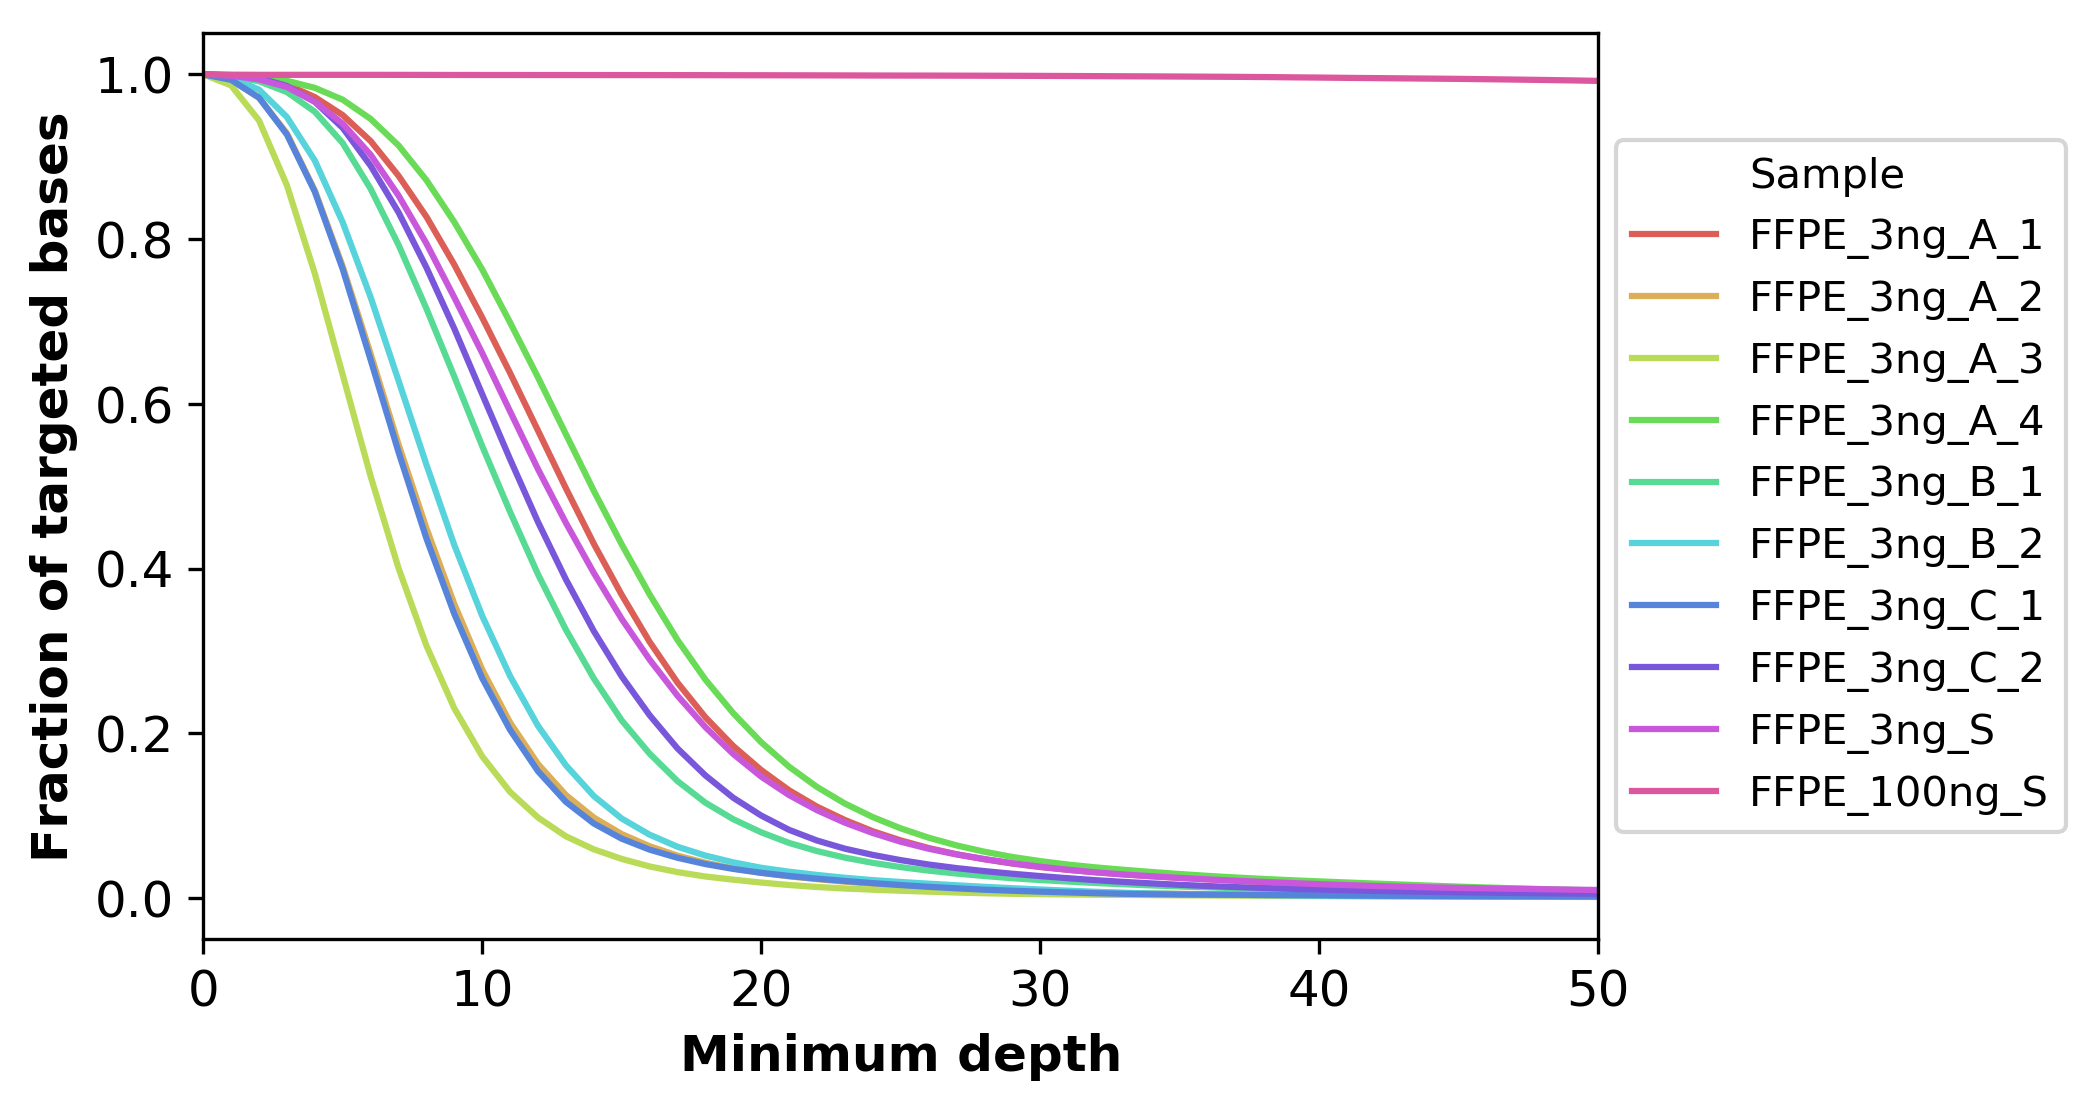

In [205]:
sns.lineplot(x='coverage',
             y='cum_frac',
             data=df,
             hue='Sample',
             palette='hls')
             
plt.xlim(0,50)
plt.ylabel('Fraction of targeted bases',fontsize=12,fontweight='bold')
plt.xlabel('Minimum depth',fontsize=12,fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(bbox_to_anchor=(1.35, .5))
plt.show()

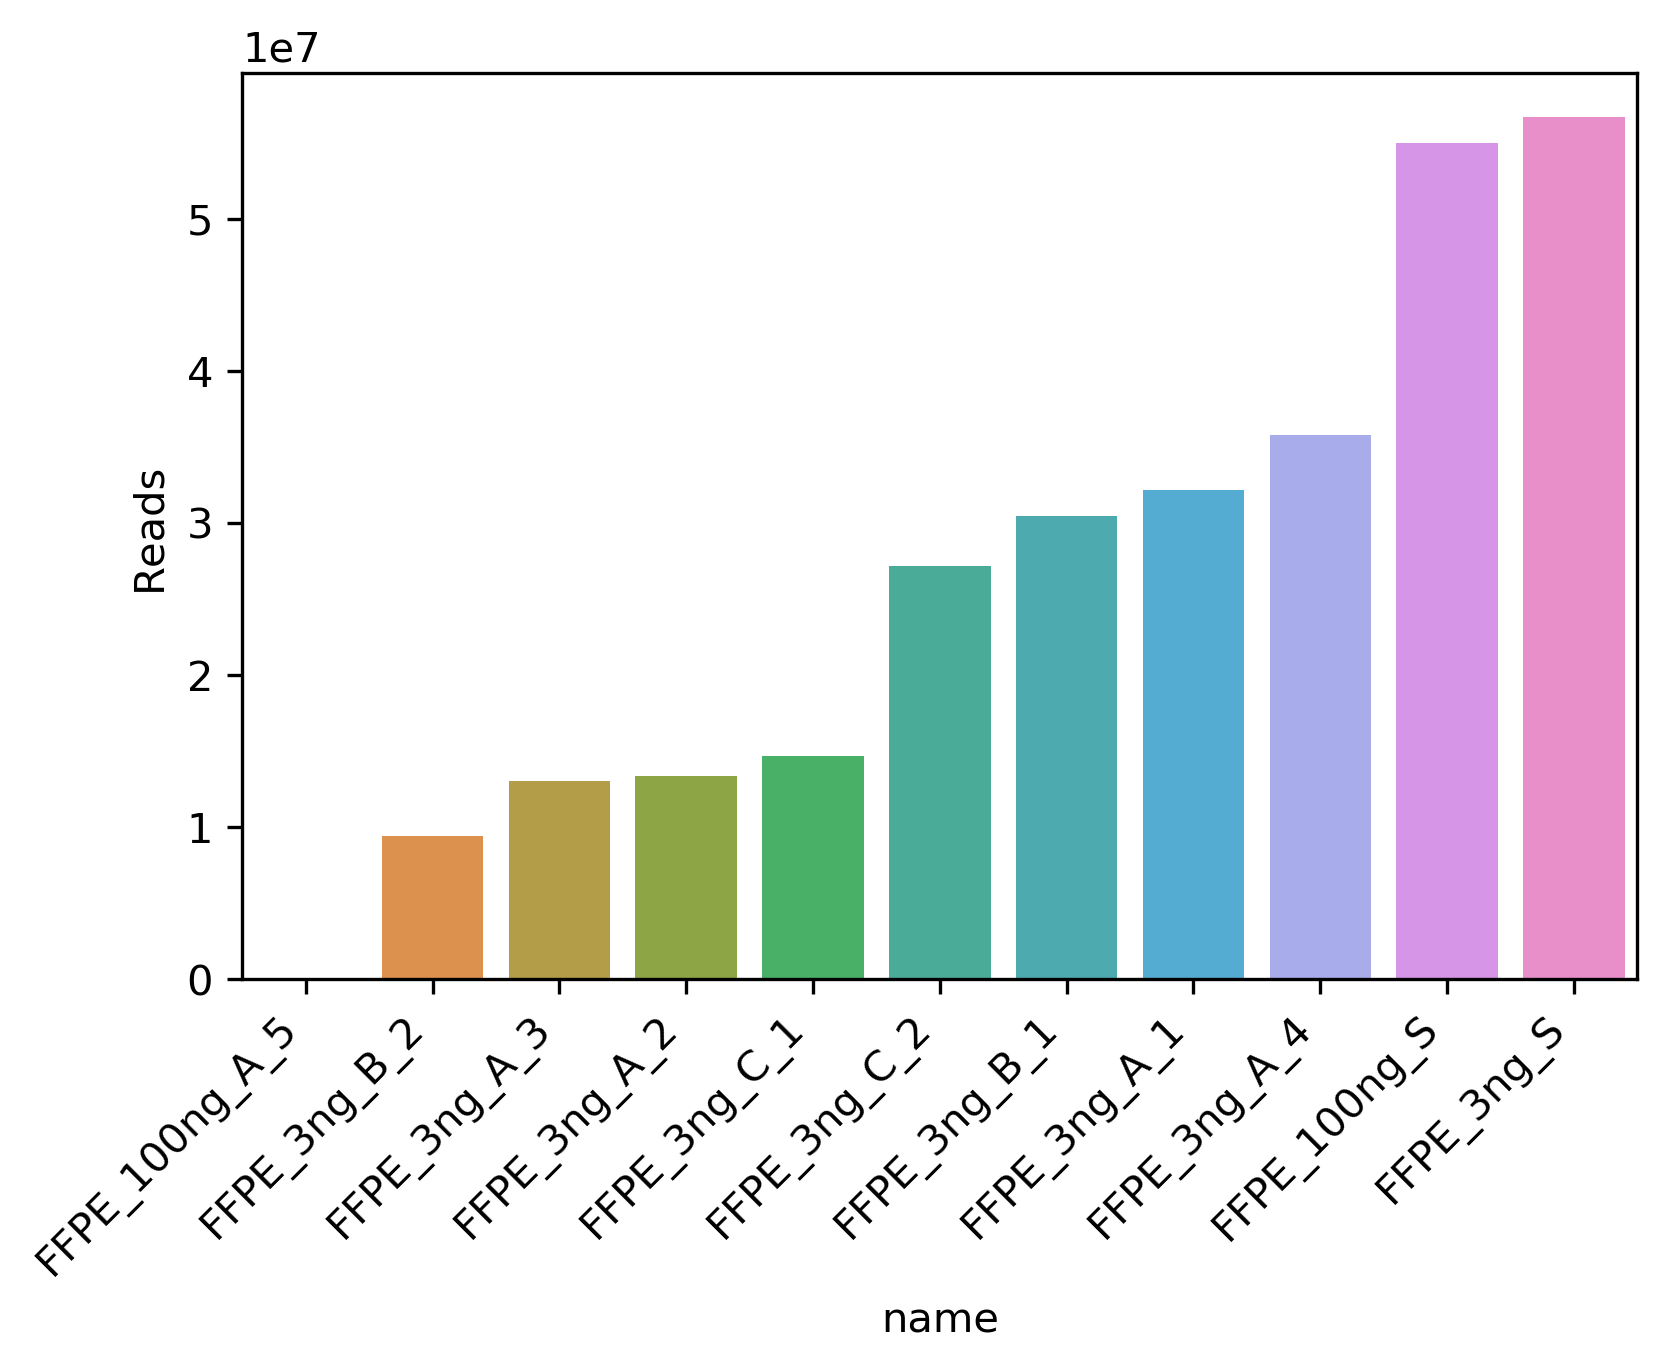

In [28]:
reads = pd.read_csv('/Users/DanielaNachmanson/Desktop/#-reads.csv',
                       header=1,
                       names=['Sample','Reads'])
reads['name'] = [sample_names_raw[s] for s in reads['Sample']]
reads = reads.sort_values(by='Reads')
sns.barplot(x='name',y='Reads',data=reads)
plt.xticks(rotation=45)
plt.xticks(ha='right')
plt.show()

In [22]:
reads

,Sample,Reads,name
0,hybr1_S2,13029481,FFPE_3ng_A_3
1,hybr1_S3,663,FFPE_100ng_A_5
2,hybr1_S4,9435186,FFPE_3ng_B_2
3,hybr1_S5,14707137,FFPE_3ng_C_1
4,hybr2,56754082,FFPE_3ng_S
5,hybr3,55015741,FFPE_100ng_S
6,hybr4_S8,32164655,FFPE_3ng_A_1
7,hybr4_S9,35785269,FFPE_3ng_A_4
8,hybr5_S10,30494313,FFPE_3ng_B_1
9,hybr1_S1,13372809,FFPE_3ng_A_2
